In [1756]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import Map, Marker, DivIcon
import geopandas as gpd


<p align="left">
  <img src="Airbnb.png" alt="Deskripsi Gambar">
</p>

# **Background** 
Festival Songkran, yang dikenal sebagai Tahun Baru Thailand, adalah perayaan yang berlangsung selama tiga hari atau lebih dan menjadi salah satu tradisi paling penting di negara ini. Festival ini  jatuh pada tanggal 13 hingga 15 April 2023, bahkan ada yang merayakan sampai seminggu. Festival ini terkenal dengan kegiatan menyiram air sebagai simbol penyucian diri, membasuh nasib buruk, dan menyambut tahun baru dengan penuh sukacita. Songkran juga melibatkan ritual keagamaan, seperti memberi penghormatan kepada para leluhur dan pergi ke kuil untuk berdoa.

Selama perayaan, Bangkok menjadi pusat utama aktivitas, dengan beberapa distrik yang menjadi pusat festival antara lain Bang Rak, Parthum Wan dan Phra Nakhon. Di lokasi-lokasi ini, ribuan orang berkumpul untuk mengikuti pesta air, parade budaya, pertunjukan seni, dan acara hiburan lainnya yang berlangsung di jalan-jalan kota.

Airbnb berkomitmen untuk mendukung para wisatawan yang ingin merasakan keunikan Songkran dengan menyediakan akomodasi yang berkualitas dan nyaman. Untuk menarik lebih banyak pengunjung dan memastikan mereka mendapatkan pengalaman menginap terbaik, Airbnb akan memberikan rekomendasi listing selama festival berlangsung terutama pada wilayah pusat perayaan.


<p align="center">
  <img src="Songkran.jpg" alt="Deskripsi Gambar">
</p>
source: https://kumparan.com/jendela-dunia/pengertian-festival-songkran-dan-tanggal-pelaksanaannya-22gcBvt5iNI/full, https://www.voanews.com/a/thailand-s-extended-songkran-festival-sees-millions-celebrate/7569611.html

# **Stakeholder** 
`1. Airbnb Marketing Lead dan Bussiness Lead`

Stakeholder utama dalam analisis ini adalah `tim marketing Airbnb dan tim bussiness Airbnb`. tim marketing akan menggunakan wawasan yang diperoleh untuk merancang `strategi pemasaran` yang akan menarik minat pengunjung untuk menggunakan Airbnb selama festival songkran berlangsung. Tim bisnis akan menggunakan hasil analisis untuk memahami profil listing Airbnb di Bangkok, termasuk preferensi tipe kamar, harga, dan faktor-faktor lain yang mempengaruhi properti yang nantinya dapat meningkatkan profit dalam Airbnb.

# **Meningkatkan Profit Airbnb: Segmentasi dan Rekomendasi Listing di Distict Pusat Perayaan Festival Songkran**
### **Rumusan Masalah** 

1. Bagaimana cara segmentasi berdasarkan grade untuk listing dalam Airbnb?
1. Bagaimana strategi pemasaran yang dapat dilakukan untuk menarik lebih banyak pelanggan ke listing dengan grade rendah agar tingkat okupansi meningkat?
1. Bagaimana meningkatkan kualitas listing dengan grade rendah agar mereka dapat bersaing dan berkontribusi lebih banyak terhadap profit perusahaan?

### **Tujuan**
1. Meningkatkan profit perusahaan dengan segmentasi listing berdasarkan grade.
1. Mengoptimalkan strategi pemasaran dengan membuat kampanye pemasaran yang lebih terarah berdasarkan segmentasi grade, dengan fokus pada penargetan pelanggan sesuai preferensi mereka.
1. Memperbaiki kualitas listing dengan membantu host meningkatkan kualitas properti mereka sehingga dapat naik ke grade yang lebih tinggi dan meningkatkan daya tarik listing tersebut.



### **Data**

**Dataset**:

1. `id` : Identitas unik Airbnb untuk tempat tersebut.
2. `name` : Nama yang dari properti
3. `host_id` : Pengidentifikasi unik Airbnb untuk tuan rumah/pengguna.
4. `host_name` : Nama tuan rumah
5. `neighbourhood` : mengenai lingkungan (neighborhood) di mana properti tersebut terletak.
6. `latitude` : Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk lintang dan bujur.
7. `longitude` : Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk lintang dan bujur.
8. `room_type` : tipe kamar yang disediakan
9. `price` : Harga harian untuk menyewa properti, dinyatakan dalam mata uang lokal (bath).
10. `minimum_nights` :  Jumlah minimum malam yang harus diinap oleh penyewa untuk properti tersebut.
11. `number_of_reviews` : Jumlah ulasan yang diterima oleh properti tersebut
12. `last_review`	: tanggal terakhir review
13. `calculated_host_listings_count` : jumlah properti yang dimiliki oleh tuan rumah pada saat pengambilan data terbaru di suatu kota atau wilayah geografis.
14. `availability_365` : Ketersediaan properti selama 365 hari. Ini menunjukkan berapa banyak hari properti tersebut tersedia untuk disewa dalam satu tahun. 
15. `number_of_reviews_ltm` : Jumlah ulasan yang diterima oleh properti dalam 12 bulan terakhir (dalam 12 bulan terakhir).

In [1757]:
df= pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

Unnamed: 0                  id  \
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                     name    host_id  \
15849       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15851   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849      Renee       Pra Wet  13.715132  100.653458  Private room   2298   
15850  Phakhamon   Ratchathewi  13.753052  100.538738  Private room   1429   
15851  Phakhamon   Ratchathewi  13.753169  100.538700  Private room   1214   
15852  Phakhamon   Ratchathewi  13.754789  100.538757  Private room   1214   
15853  Phakhamon   Ratchathewi  13.752960  100.540820  Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849              28                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0

# **1. Data Understanding**

In [1758]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [1759]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [1760]:
display(df.describe(), df.describe(include='object'))

Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

**`Insight`**
> - Pada kolom `price` yaitu terdapat nilai minimum `0` dan nilai maksimum yaitu `1100000` (dalam bath).
> - Pada kolom`minimum_nights` memiliki nilai maksimum yaitu `1125` .
> - Pada kolom `number of reviews` memiliki nilai maksimum yaitu `1124`, terdapat juga listing yang tidak memiliki review.
> - `host_name` dengan nama `Curry` memiliki listing terbanyak sebesar `228`listing.
> - `Entire home/apt` merupakan tipe yang dimiliki paling banyak di Bangkok yaitu sebesar `8912`
> - `Vadhana` merupakan distrik yang memiliki listing terbanyak sebesar`2153`

### **Persebaran data kolom numerik**

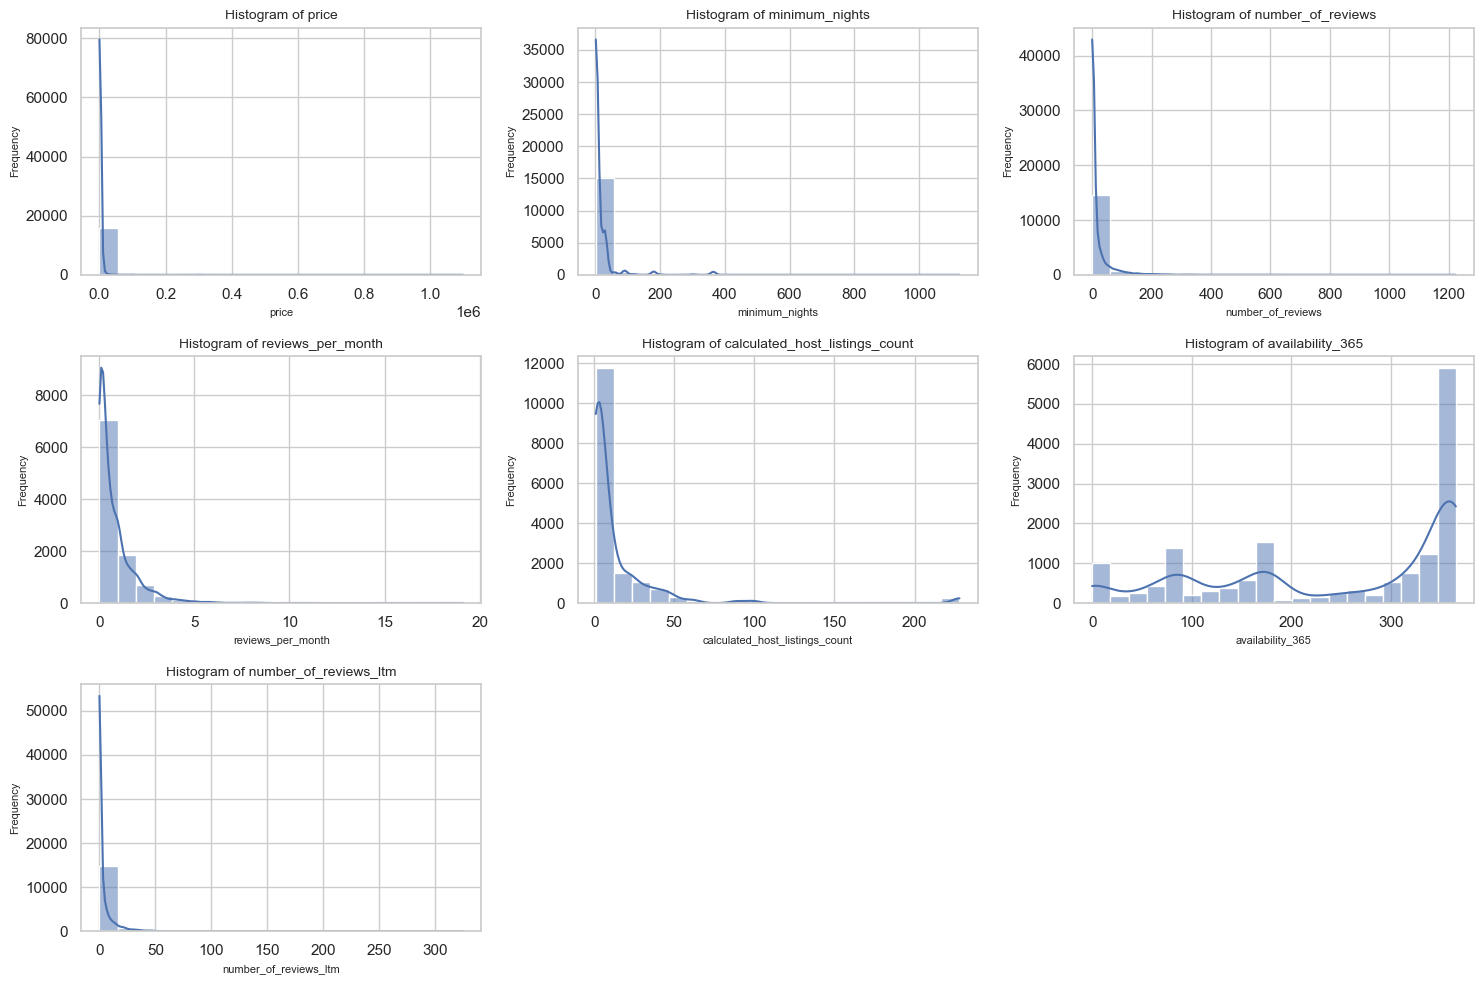

In [1761]:
# Memilih kolom-kolom numerik
df_num = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

# Menentukan ukuran subplot
num_cols = 3
num_rows = (len(df_num.columns) + num_cols - 1) // num_cols

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Membuat histogram untuk setiap kolom numerik
for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num[col], kde=True, bins=20, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Histogram of {col}', fontsize=10)
    axes[i // num_cols, i % num_cols].set_xlabel(col, fontsize=8)
    axes[i // num_cols, i % num_cols].set_ylabel('Frequency', fontsize=8)

# Menghapus subplot yang kosong
for i in range(len(df_num.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**`Insight`**

Semua kolom numerik dalam data set ini persebaran datanya memiliki distribusi tidak normal.

### **Mencari Data Kosong**

In [1762]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [1763]:
def missing_values_table(data):
    miss_val_count = data.isnull().sum()
    miss_val_percent = ((miss_val_count / len(data)) * 100).round(2).astype(str)+'%'
    table = pd.concat([miss_val_count, miss_val_percent], axis=1)
    table.columns = ['Jumlah Missing Values', 'Proporsi Missing Values']
    table = table[table['Jumlah Missing Values'] != 0].sort_values('Proporsi Missing Values', ascending=False).round(2)
    return table

df_missing_values = missing_values_table(df)
display(df_missing_values)

Jumlah Missing Values Proporsi Missing Values
last_review                         5790                  36.52%
reviews_per_month                   5790                  36.52%
name                                   8                   0.05%
host_name                              1                   0.01%

**`Insight`**

Missing value terbanyak terdapat pada kolom last review dan reviews per month, artinya ada banyak listing yang tidak mendapat atau bahkan tidak pernah sama sekali mendapatkan review

### **Melihat Data Unik Tiap Kolom**

In [1764]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                       Unnamed: 0             15854   
1                               id             15854   
2                             name             14794   
3                          host_id              6659   
4                        host_name              5312   
5                    neighbourhood                50   
6                         latitude              9606   
7                        longitude             10224   
8                        room_type                 4   
9                            price              3040   
10                  minimum_nights                86   
11               number_of_reviews               298   
12                     last_review              1669   
13               reviews_per_month               513   
14  calculated_host_listings_count                50   
15                availability_365               366   
16           number_of_reviews_ltm                85   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [1765]:
data_duplicate = df[df.duplicated(subset=['latitude', 'longitude', 'neighbourhood', 'last_review', 'price', 'name', 'room_type'], keep=False)]
display('Jumlah data duplikat:', len(data_duplicate))
data_duplicate.head()

'Jumlah data duplikat:'

22

Unnamed: 0                  id  \
5890         5890            28831409   
5976         5976            28907857   
8789         8789            37953702   
8790         8790            37954129   
15120       15120  767112544721073364   

                                          name    host_id host_name  \
5890                 NA BANGLAMPOO GUEST HOUSE   87704107       Yui   
5976                 NA BANGLAMPOO GUEST HOUSE   87704107       Yui   
8789                                    small1   97598307       Soo   
8790                                    small1   97598307       Soo   
15120  Sathon Luxury Loft/China Town/Icon Siam  276781306      Alex   

      neighbourhood   latitude   longitude        room_type  price  \
5890    Phra Nakhon  13.762790  100.497900     Private room   1400   
5976    Phra Nakhon  13.762790  100.497900     Private room   1400   
8789     Don Mueang  13.920720  100.575780      Shared room    350   
8790     Don Mueang  13.920720  100.575780      Shared room    350   
15120        Sathon  13.710777  100.519891  Entire home/apt   1580   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
5890                1                  0         NaN                NaN   
5976                1                  0         NaN                NaN   
8789                1                  0         NaN                NaN   
8790                1                  0         NaN                NaN   
15120               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
5890                                9               361                      0  
5976                                9               361                      0  
8789                                4               180                      0  
8790                                4               180                      0  
15120                              13               326                      0

**`Insight`**

Semua kolom dalam data set memiliki data unik masing-masing, terdapat juga beberapa data yang memiliki duplikat

# **2. Data Cleaning**/**Data Preparation**

### **Mengubah dan Menghapus data**

In [1766]:
df_clean = df.copy()

In [1767]:
df_clean = df_clean.dropna(subset=['name','host_name'])

In [1768]:
df_clean = df_clean[df_clean['price'] != 0]

### **Mengubah nama kolom Neighbourhood menjadi District**

In [1769]:
df_clean = df_clean.rename(columns={'neighbourhood': 'district'})

### **Filter Listing dengan minimum nights lebih dari 3 malam**

In [1770]:
df_clean = df_clean[df_clean['minimum_nights'] <= 3]
df_clean

Unnamed: 0                  id  \
0               0               27934   
1               1               27979   
4               4              941865   
6               6               48736   
7               7             1738669   
...           ...                 ...   
15848       15848  790460476887978054   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                     name    host_id  \
0                         Nice room with superb city view     120437   
1                          Easy going landlord,easy place     120541   
4                              Suite Room 3 at MetroPoint     610315   
6                         Condo with Chaopraya River View     222005   
7                         1 chic bedroom apartment in BKK    7045870   
...                                                   ...        ...   
15848  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15851   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name     district   latitude   longitude        room_type  price  \
0         Nuttee  Ratchathewi  13.759830  100.541340  Entire home/apt   1905   
1            Emy      Bang Na  13.668180  100.616740     Private room   1316   
4          Kasem    Bang Kapi  13.768720  100.633380     Private room   1905   
6       Athitaya   Rat Burana  13.685560  100.495350     Private room   1558   
7       Jiraporn   Chatu Chak  13.829250  100.567370  Entire home/apt   1461   
...          ...          ...        ...         ...              ...    ...   
15848  Phakhamon  Ratchathewi  13.752904  100.540381     Private room   1400   
15850  Phakhamon  Ratchathewi  13.753052  100.538738     Private room   1429   
15851  Phakhamon  Ratchathewi  13.753169  100.538700     Private room   1214   
15852  Phakhamon  Ratchathewi  13.754789  100.538757     Private room   1214   
15853  Phakhamon  Ratchathewi  13.752960  100.540820     Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   3                 65  2020-01-06               0.50   
1                   1                  0         NaN                NaN   
4                   1                  0         NaN                NaN   
6                   3                  1  2014-02-03               0.01   
7                   1                  0         NaN                NaN   
...               ...                ...         ...                ...   
15848               1                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                                   2               353                      0  
1                                   2               358                      0  
4                                   3               365                      0  
6                                   1               365                      0  
7                                   1               365                      0  
...                               ...               ...                    ...  
15848                              14               357                      0  
15850                              14               365                      0  
15851                              14               365   


**`Insight`**

Menghapus penginapan dengan minimum nights lebih dari 3 karena  festival hanya berlangsung 1-3 hari bahkan ada yang melaksanakan hingga seminggu, maka penginapan dengan minimum nights lebih dari 3 hari tidak relevan selama festival

### **Mengambil data dan kolom yang dibutuhkan**

In [1771]:
district_pusat_perayaan = ['Bang Rak', 'Parthum Wan', 'Phra Nakhon']  # Pastikan penulisan konsisten
filtered_data_pusatperayaan = df_clean[df_clean['district'].isin(district_pusat_perayaan)]
sorted_data_pusatperayaan = filtered_data_pusatperayaan.sort_values(by='district', key=lambda x: x.map({'Bang Rak': 1, 'Pathum Wan': 2, 'Phra Nakhon': 3}))
# Mengambil 10 data dari masing-masing neighbourhood
limited_data_pusatperayaan = sorted_data_pusatperayaan.groupby('district').head(10).reset_index(drop=True)
# Menghapus kolom yang tidak diperlukan
pusat_perayaan_festival = filtered_data_pusatperayaan.drop(columns=['Unnamed: 0','id','host_id', 'host_name', 'reviews_per_month','last_review', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'])
pusat_perayaan_festival.to_csv('airbnb_bangkok_cleaned_data_kahfi.csv', index=False)
pusat_perayaan_festival

name     district  \
10                          Sathorn Terrace Apartment(61)     Bang Rak   
71                    Inn Saladaeng - Superior hotel room     Bang Rak   
79                    Near Bangkok more space than urban!  Phra Nakhon   
166               Elegant 2-Brm Condo in Heart of Bangkok     Bang Rak   
186                                      วรภาดา น้อยพันธ์     Bang Rak   
...                                                   ...          ...   
15739                    Economy room for a solo traveler  Phra Nakhon   
15746               Standard Private Room for 2  Near BTS     Bang Rak   
15748                      Unique room with Landmark view     Bang Rak   
15796  Stunning river view in the heart of BKK 5min/train     Bang Rak   
15808                    Boutique room near Khaosarn Road  Phra Nakhon   

        latitude   longitude        room_type  price  minimum_nights  \
10     13.719340  100.517600     Private room   1150               2   
71     13.728250  100.537740  Entire home/apt   1589               1   
79     13.751350  100.494470      Shared room   5195               1   
166    13.725430  100.538380  Entire home/apt   5195               3   
186    13.731800  100.523510     Private room    980               1   
...          ...         ...              ...    ...             ...   
15739  13.754990  100.502250     Private room    681               1   
15746  13.726509  100.527823     Private room   1014               1   
15748  13.727081  100.525809     Private room   1200               2   
15796  13.719792  100.515910  Entire home/apt   3304               2   
15808  13.756073  100.501863     Private room   1500               1   

       number_of_reviews  
10                    27  
71                    36  
79                     0  
166                   95  
186                    0  
...                  ...  
15739                  0  
15746                  0  
15748                  0  
15796                  2  
15808                  0  

[1506 rows x 8 columns]

**`Insight`**
> - Menghapus kolom `Unnamed: 0','id','host_id', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', karena tidak digunakan dalam analisa.
> - Pada kolom `price`, listing yang memiliki nilai 0 dihapus karena tidak ada listing yang gratis ketika disewa.



# **3. Data Analysis**

### **Deskripsi Statistik**

**Bang Rak**

In [1772]:
display(pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Bang Rak'].describe(),
        pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Bang Rak'].describe(include=object))
        

latitude   longitude         price  minimum_nights  number_of_reviews
count  598.000000  598.000000    598.000000      598.000000         598.000000
mean    13.725800  100.525332   2830.590301        1.183946          22.458194
std      0.003714    0.006585   3269.377989        0.458981          46.243302
min     13.718120  100.513250    295.000000        1.000000           0.000000
25%     13.723335  100.519305   1035.250000        1.000000           0.000000
50%     13.725580  100.525310   1832.000000        1.000000           3.000000
75%     13.727477  100.530480   3500.000000        1.000000          18.000000
max     13.737630  100.540250  27000.000000        3.000000         257.000000

name  district  \
count                                                  598       598   
unique                                                 573         1   
top     New spacious 2BR 3PPL with pool&gym Silom &Sathorn  Bang Rak   
freq                                                     8       598   

           room_type  
count            598  
unique             4  
top     Private room  
freq             292

**Parthum Wan**

In [1773]:
display(pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Parthum Wan'].describe(), 
        pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Parthum Wan'].describe(include=object))

latitude   longitude          price  minimum_nights  \
count  298.000000  298.000000     298.000000      298.000000   
mean    13.741870  100.535342    5418.765101        1.234899   
std      0.004833    0.012021   18433.624006        0.536722   
min     13.723490  100.516490     331.000000        1.000000   
25%     13.738215  100.523190    1734.250000        1.000000   
50%     13.742585  100.539820    2997.500000        1.000000   
75%     13.745508  100.545660    4364.500000        1.000000   
max     13.751500  100.551270  300000.000000        3.000000   

       number_of_reviews  
count         298.000000  
mean           20.463087  
std            40.342811  
min             0.000000  
25%             0.000000  
50%             2.500000  
75%            19.000000  
max           344.000000

name     district  \
count                                                298          298   
unique                                               290            1   
top     Nana BTS Spacious 1BR W/Balcony Asok Terminal 21  Parthum Wan   
freq                                                   3          298   

              room_type  
count               298  
unique                4  
top     Entire home/apt  
freq                121

**Phra Nakhon**

In [1774]:
display(pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Phra Nakhon'].describe(), 
        pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Phra Nakhon'].describe(include=object))

latitude   longitude         price  minimum_nights  number_of_reviews
count  610.000000  610.000000    610.000000      610.000000         610.000000
mean    13.758023  100.499527   1712.709836        1.049180          13.236066
std      0.005300    0.003063   1835.592096        0.238098          32.266796
min     13.741970  100.488760    280.000000        1.000000           0.000000
25%     13.754850  100.497422    594.000000        1.000000           0.000000
50%     13.758815  100.499250   1108.000000        1.000000           2.000000
75%     13.761958  100.502085   1999.750000        1.000000          10.000000
max     13.771680  100.506400  17316.000000        3.000000         330.000000

name     district     room_type
count                      610          610           610
unique                     538            1             4
top     14 Male Dormitory Room  Phra Nakhon  Private room
freq                        14          610           354

### **Mengecek jumlah listing di tiap district pusat perayaan festival**

In [1775]:
listing_count_per_neighbourhood = pusat_perayaan_festival.groupby('district')['name'].count().sort_values(ascending=True).reset_index()

# Mengganti nama kolom untuk membuatnya lebih jelas
listing_count_per_neighbourhood.columns = ['District', 'Listing Count']
listing_count_per_neighbourhood

District  Listing Count
0  Parthum Wan            298
1     Bang Rak            598
2  Phra Nakhon            610

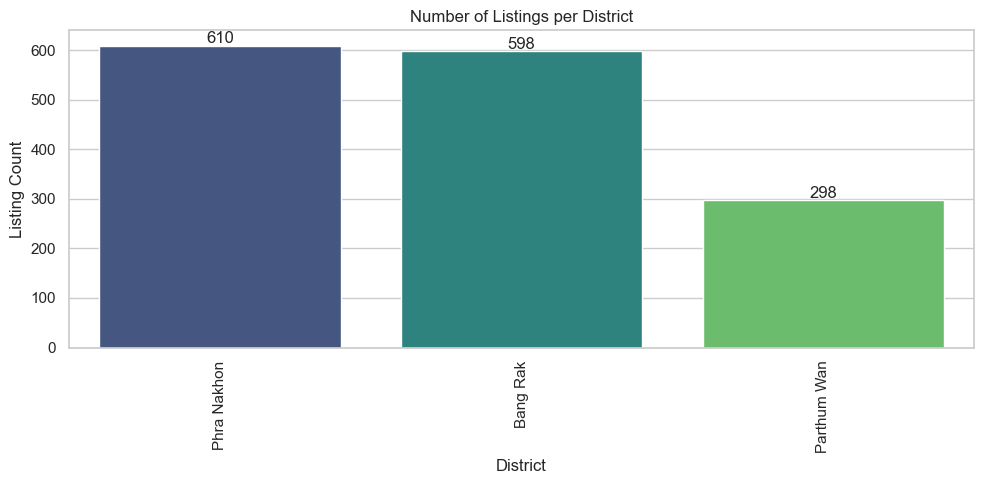

In [1776]:
plt.figure(figsize=(10, 5))

# Membuat plot dengan Seaborn
ax = sns.barplot(x='District', y='Listing Count', data=listing_count_per_district, palette='viridis', hue='District', legend=False)

# Menambahkan label jumlah di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Menambahkan judul dan label
plt.xticks(rotation=90)  # Memutar label sumbu-x agar lebih mudah dibaca
plt.xlabel('District')
plt.ylabel('Listing Count')
plt.title('Number of Listings per District')

# Menampilkan plot
plt.tight_layout()
plt.show()

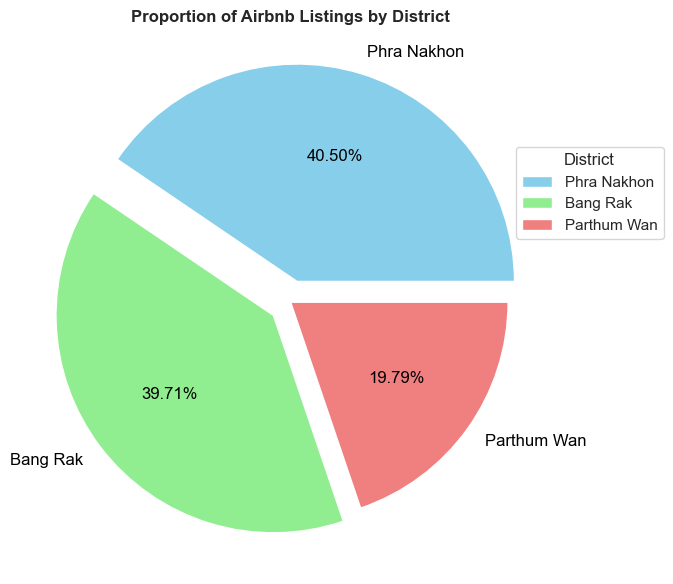

In [1777]:
district_counts = pusat_perayaan_festival[pusat_perayaan_festival['district'].isin(['Bang Rak', 'Parthum Wan', 'Phra Nakhon'])]['district'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(x=district_counts, 
        labels=district_counts.index, 
        autopct='%.2f%%', 
        textprops={'color': 'black', 'fontname': 'arial', 'fontsize': 12},
        explode=(0.1, 0.1, 0), 
        colors=['skyblue', 'lightgreen', 'lightcoral'])

# Adding legend and title
plt.legend(title='District', loc='upper right', bbox_to_anchor=(1.2, 0.8))
plt.title('Proportion of Airbnb Listings by District', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

**`Insight`**

Berdasarkan kedua chart diatas didapatkan bahwa listing terbanyak terdapat pada distrik Phra Nakhon dan yang paling sedikit ada pada distrik Parthum Wan.

### **Maksimal harga di tiap district**

In [1778]:
top_price_per_district = pusat_perayaan_festival.loc[pusat_perayaan_festival.groupby(['district'])['price'].idxmax()].reset_index(drop=True)

# Menampilkan kolom yang relevan
top_price_per_district = top_price_per_district[['district', 'room_type', 'name', 'price']]

# Menampilkan hasilnya
top_price_per_district

district     room_type                                            name  \
0     Bang Rak  Private room        2 Night Cruise from Bangkok to Ayutthaya   
1  Parthum Wan  Private room     Modern Deluxe Private Double Bed (2 adults)   
2  Phra Nakhon   Shared room  Pauls Inn ,A great riverside view 54 Sq/M cond   

    price  
0   27000  
1  300000  
2   17316

### **Rata-Rata harga tiap district**

In [1779]:
# Menghitung rata-rata harga di setiap 'district'
average_price_per_district = pusat_perayaan_festival.groupby('district')['price'].mean().reset_index()

# Mengganti nama kolom agar lebih jelas
average_price_per_district.columns = ['District', 'Average Price']

# Menampilkan hasil
average_price_per_district

District  Average Price
0     Bang Rak    2830.590301
1  Parthum Wan    5418.765101
2  Phra Nakhon    1712.709836

**`Insight`**

Rata-Rata harga terbesar pada listing dari ketiga distrik pusat perayaan terdapat pada distrik Parthum Wan dan paling sedikit di distrik Phra Nakhon.

# **Distrik Pusat Perayaan Songkran**

## **Listing di Pusat Perayaan festival 'Bang Rak', 'Parthum Wan', 'Phra Nakhon'**


### **Berdasarkan Room Type**

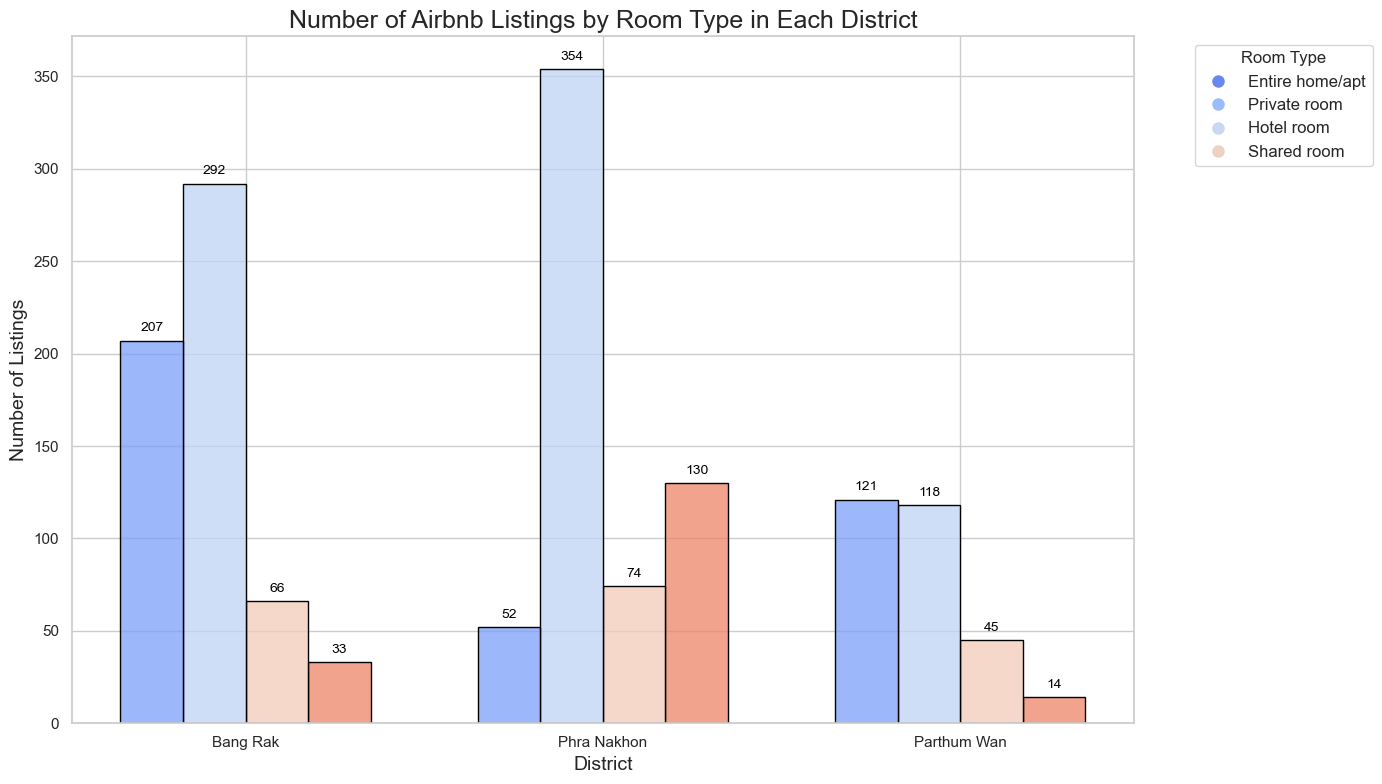

In [1780]:
sns.set_style("whitegrid")

# Creating the plot using Seaborn
plt.figure(figsize=(14, 8))
ax = sns.histplot(
    data=filtered_data_pusatperayaan,
    x='district',
    hue='room_type',
    multiple='dodge',
    palette='coolwarm',
    hue_order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
    edgecolor='black',
    shrink=0.7
)

# Adding title and labels
ax.set_title('Number of Airbnb Listings by Room Type in Each District', fontsize=18)
ax.set_xlabel('District', fontsize=14)
ax.set_ylabel('Number of Listings', fontsize=14)

# Displaying the legend with room type labels
legend_labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=sns.color_palette('coolwarm')[i], markersize=10) for i, label in enumerate(legend_labels)]
ax.legend(handles=handles, title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adding number labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', 
                fontsize=10, color='black')

# Showing the plot
plt.tight_layout()
plt.show()

**`Insight`**

Dapat dilihat bahwa berdasarkan tipe kamar pada masing-masing distrik memiliki jumlah yang berbeda-beda didapatkan bahwa hotel room merupakan tipe kamar terbanyak di distrik Bang Rak dan Phra Nakhon. Sementara pada distrik Parthum Wan tipe kamar yang paling banyak adalah tipe kamar entire home/apt.

### **Penambahan Keyword untuk Segmentasi**

In [1781]:
# Kata kunci untuk aksesibilitas, promo, fasilitas, dan estetika
keywords_aksesibilitas = ['bts', 'mrt', 'near', 'min', 'walk', 'mins', 'station', 'airport', 'close', 'skytrain']
keywords_promosi = ['free', 'breakfast']
keywords_fasilitas = ['pool', 'wifi', 'gym', 'rooftop', 'park']
keywords_estetika = ['new', 'cozy', 'luxury', 'view', 'spacious', 'modern', 'big', 'clean', 'lovely', 'comfy', 'nice']

# Fungsi untuk mengecek kata kunci
def check_keywords(name, keywords):
    return [keyword for keyword in keywords if keyword in name.lower()]

# Membuat kolom baru 'keywords' dan inisialisasi dengan string kosong
pusat_perayaan_festival['keywords'] = ''  # Inisialisasi kolom 'keywords'

# Menggunakan fungsi check_keywords untuk mengisi nilai kolom 'keywords'
for index, row in pusat_perayaan_festival.iterrows():
    description = row['name'].lower()
    found_categories = []
    
    # Cek kata kunci dari setiap kategori dan tambahkan kategori ke dalam list
    if check_keywords(description, keywords_aksesibilitas):
        found_categories.append('aksesibilitas')
    if check_keywords(description, keywords_promosi):
        found_categories.append('promosi')
    if check_keywords(description, keywords_fasilitas):
        found_categories.append('fasilitas')
    if check_keywords(description, keywords_estetika):
        found_categories.append('estetika')
    
    # Mengisi kolom 'keywords' dengan hasil yang ditemukan
    if found_categories:
        pusat_perayaan_festival.loc[index, 'keywords'] = ', '.join(found_categories)
    else:
        pusat_perayaan_festival.loc[index, 'keywords'] = 'tidak memakai keywords'

# Menampilkan sample DataFrame
pusat_perayaan_festival.sample(5)

name     district  latitude  \
8522      Twin Bed with Private Bathroom in Khao San  Phra Nakhon  13.76226   
5884                     Na Banglampoo Guest House 5  Phra Nakhon  13.76359   
6348        Female Bangkok safe stay 4-6 people room  Parthum Wan  13.74761   
6493                          14 Lady Dormitory Room  Phra Nakhon  13.75750   
13421  Artist Double Space Studio, Near Khaosan Road  Phra Nakhon  13.76214   

       longitude     room_type  price  minimum_nights  number_of_reviews  \
8522   100.50019    Hotel room    990               1                  0   
5884   100.49907  Private room    750               1                  2   
6348   100.52543   Shared room    500               1                  2   
6493   100.49698   Shared room    550               1                  0   
13421  100.49713  Private room   1656               1                 17   

                     keywords  
8522   tidak memakai keywords  
5884   tidak memakai keywords  
6348   tidak memakai keywords  
6493   tidak memakai keywords  
13421           aksesibilitas

**`Insight`**

Keyword dibuat berdasarkan 4 bagian yaitu aksesbilitas, estetika, fasilitas, promosi. Keywoard didapatkan berdasarkan dari nama listing.

### **Segmentasi Untuk Penginapan dengan Grade**

In [1782]:
def grade_accommodation(row, city_criteria):
    # Mengambil kriteria untuk kota tertentu
    price_thresholds = city_criteria['price_thresholds']
    review_thresholds = city_criteria['review_thresholds']
    additional_criteria_minimum = city_criteria['additional_criteria_minimum']

    # Kondisi rentang harga
    if row['price'] >= price_thresholds['high']:
        price_score = 'high'
    elif price_thresholds['medium'] <= row['price'] < price_thresholds['high']:
        price_score = 'medium'
    else:
        price_score = 'low'
    
    # Kondisi jumlah ulasan
    if row['number_of_reviews'] >= review_thresholds['high']:
        reviews_score = 'high'
    elif review_thresholds['medium'] <= row['number_of_reviews'] < review_thresholds['high']:
        reviews_score = 'medium'
    else:
        reviews_score = 'low'
    
    # Memeriksa atribut tambahan
    has_accessibility = check_keywords(row['name'], city_criteria['keywords_accessibility'])
    has_promo = check_keywords(row['name'], city_criteria['keywords_promo'])
    has_facilities = check_keywords(row['name'], city_criteria['keywords_facilities'])
    has_esthetics = check_keywords(row['name'], city_criteria['keywords_esthetics'])
    
    # Menghitung jumlah kriteria tambahan yang terpenuhi
    additional_criteria_count = sum([has_accessibility, has_promo, has_facilities, has_esthetics])
    
    # Menentukan nilai berdasarkan skor dan jumlah kriteria tambahan
    if price_score == 'high' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['A']:
        return 'A'
    elif price_score == 'high' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'B'
    elif price_score == 'high' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'B'
    elif price_score == 'high' and reviews_score == 'medium' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'C'
    elif price_score == 'high' and reviews_score == 'medium' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'C'
    elif price_score == 'high' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['A']:
        return 'C'
    elif price_score == 'high' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'D'
    elif price_score == 'medium' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['A']:
        return 'C'
    elif price_score == 'medium' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'C'
    elif price_score == 'medium' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'D'
    elif price_score == 'medium' and reviews_score == 'medium' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'C'
    elif price_score == 'medium' and reviews_score == 'medium' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'C'
    elif price_score == 'medium' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['A']:
        return 'D'
    elif price_score == 'medium' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'D'
    elif price_score == 'medium' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'D'
    elif price_score == 'low' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'D'
    elif price_score == 'low' and reviews_score == 'high' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'D'
    elif price_score == 'low' and reviews_score == 'medium' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'D'
    elif price_score == 'low' and reviews_score == 'medium' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'D'
    elif price_score == 'low' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['A']:
        return 'E'
    elif price_score == 'low' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['B']:
        return 'E'
    elif price_score == 'low' and reviews_score == 'low' and additional_criteria_count >= additional_criteria_minimum['C']:
        return 'E'
    else:
        return 'E'  # Default ke D jika tidak memenuhi kondisi lain

def check_keywords(name, keywords_list):
    # Memeriksa apakah salah satu kata kunci terdapat di dalam nama
    return any(keyword.lower() in name.lower() for keyword in keywords_list)



**`Insight`**
>- Harga Tinggi dan Ulasan Tinggi: Ketika harga tinggi dan ulasan tinggi, properti cenderung diberi nilai lebih tinggi (A atau B) tergantung pada kriteria tambahan yang terpenuhi.
>- Harga Sedang dan Ulasan Sedang: Ketika harga sedang dan ulasan sedang, properti umumnya diberi nilai menengah (C) atau lebih rendah (D), tergantung pada jumlah kriteria tambahan yang terpenuhi.
>- Harga Rendah dan Ulasan Rendah: Properti dengan harga rendah dan ulasan rendah cenderung mendapatkan nilai paling rendah (E), karena kualitasnya dianggap kurang memadai baik dari segi harga maupun ulasan.

### **Menentukan maksimal kapasitas tiap tipe kamar**

In [1818]:
# Menambahkan kolom untuk kapasitas maksimum berdasarkan tipe kamar
def get_max_capacity(room_type):
    if room_type == "Entire home/apt":
        return (8, 12)  # Rentang 8-12 orang
    elif room_type == "Private room":
        return (1, 2)  # Rentang 1-2 orang
    elif room_type == "Shared room":
        return (2, 6)  # Rentang 2-6 orang
    elif room_type == "Hotel room":
        return (1, 4)  # Rentang 1-4 orang
    else:
        return None  # Atau Anda bisa menetapkan nilai default

# Menggunakan apply untuk menambahkan kolom maximum_capacity
pusat_perayaan_festival['maximum_capacity'] = pusat_perayaan_festival['room_type'].apply(get_max_capacity)

# Menampilkan DataFrame yang diperbarui
pusat_perayaan_festival.to_csv('airbnb_bangkok_kapasitas.csv', index=False)
pusat_perayaan_festival

name     district  \
10                          Sathorn Terrace Apartment(61)     Bang Rak   
71                    Inn Saladaeng - Superior hotel room     Bang Rak   
79                    Near Bangkok more space than urban!  Phra Nakhon   
166               Elegant 2-Brm Condo in Heart of Bangkok     Bang Rak   
186                                      วรภาดา น้อยพันธ์     Bang Rak   
...                                                   ...          ...   
15739                    Economy room for a solo traveler  Phra Nakhon   
15746               Standard Private Room for 2  Near BTS     Bang Rak   
15748                      Unique room with Landmark view     Bang Rak   
15796  Stunning river view in the heart of BKK 5min/train     Bang Rak   
15808                    Boutique room near Khaosarn Road  Phra Nakhon   

        latitude   longitude        room_type  price  minimum_nights  \
10     13.719340  100.517600     Private room   1150               2   
71     13.728250  100.537740  Entire home/apt   1589               1   
79     13.751350  100.494470      Shared room   5195               1   
166    13.725430  100.538380  Entire home/apt   5195               3   
186    13.731800  100.523510     Private room    980               1   
...          ...         ...              ...    ...             ...   
15739  13.754990  100.502250     Private room    681               1   
15746  13.726509  100.527823     Private room   1014               1   
15748  13.727081  100.525809     Private room   1200               2   
15796  13.719792  100.515910  Entire home/apt   3304               2   
15808  13.756073  100.501863     Private room   1500               1   

       number_of_reviews                 keywords maximum_capacity  
10                    27   tidak memakai keywords           (1, 2)  
71                    36   tidak memakai keywords          (8, 12)  
79                     0            aksesibilitas           (2, 6)  
166                   95   tidak memakai keywords          (8, 12)  
186                    0   tidak memakai keywords           (1, 2)  
...                  ...                      ...              ...  
15739                  0   tidak memakai keywords           (1, 2)  
15746                  0            aksesibilitas           (1, 2)  
15748                  0                 estetika           (1, 2)  
15796                  2  aksesibilitas, estetika          (8, 12)  
15808                  0            aksesibilitas           (1, 2)  

[1506 rows x 10 columns]

# **Rekomendasi Penginapan di Bang Rak**

### **Segmentasi di Distrik Bang Rak**

In [1820]:
criteria_district_bangrak = {
    'price_thresholds': {'high': 3500, 'medium': 1832},
    'review_thresholds': {'high': 18, 'medium': 3},
    'additional_criteria_minimum': {'A': 2, 'B': 1, 'C': 0},
    'keywords_accessibility': ['bts', 'mrt', 'near', 'min', 'walk', 'mins', 'station', 'airport', 'close', 'skytrain'],
    'keywords_promo': ['free', 'breakfast'],
    'keywords_facilities': ['pool', 'wifi', 'gym', 'rooftop', 'park'],
    'keywords_esthetics': ['new', 'cozy', 'luxury', 'view', 'spacious', 'modern', 'big', 'clean', 'lovely', 'comfy', 'nice']
}
# Contoh DataFrame untuk data akomodasi di berbagai distrik
bangrak_segmentation = pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Bang Rak'].copy()

# Menerapkan fungsi grading untuk menentukan grade di distrik Bang Rak
bangrak_segmentation.loc[:, 'Grade_BangRak'] = bangrak_segmentation.apply(grade_accommodation, axis=1, city_criteria=criteria_district_bangrak)

# Menampilkan DataFrame yang sudah difilter dan diberi grade
bangrak_segmentation.to_csv('airbnb_bangkok_bangrak.csv', index=False)
bangrak_segmentation

name  district  \
10                          Sathorn Terrace Apartment(61)  Bang Rak   
71                    Inn Saladaeng - Superior hotel room  Bang Rak   
166               Elegant 2-Brm Condo in Heart of Bangkok  Bang Rak   
186                                      วรภาดา น้อยพันธ์  Bang Rak   
227                     Large 2 bedrooms apartment, Silom  Bang Rak   
...                                                   ...       ...   
15661                  Deluxe Private Room for 2 near BTS  Bang Rak   
15693                       Astounding view on river bank  Bang Rak   
15746               Standard Private Room for 2  Near BTS  Bang Rak   
15748                      Unique room with Landmark view  Bang Rak   
15796  Stunning river view in the heart of BKK 5min/train  Bang Rak   

        latitude   longitude        room_type  price  minimum_nights  \
10     13.719340  100.517600     Private room   1150               2   
71     13.728250  100.537740  Entire home/apt   1589               1   
166    13.725430  100.538380  Entire home/apt   5195               3   
186    13.731800  100.523510     Private room    980               1   
227    13.720040  100.518600  Entire home/apt   5500               2   
...          ...         ...              ...    ...             ...   
15661  13.725475  100.528877     Private room   1262               1   
15693  13.721984  100.516085  Entire home/apt  12000               1   
15746  13.726509  100.527823     Private room   1014               1   
15748  13.727081  100.525809     Private room   1200               2   
15796  13.719792  100.515910  Entire home/apt   3304               2   

       number_of_reviews                 keywords maximum_capacity  \
10                    27   tidak memakai keywords           (1, 2)   
71                    36   tidak memakai keywords          (8, 12)   
166                   95   tidak memakai keywords          (8, 12)   
186                    0   tidak memakai keywords           (1, 2)   
227                   25   tidak memakai keywords          (8, 12)   
...                  ...                      ...              ...   
15661                  0            aksesibilitas           (1, 2)   
15693                  0                 estetika          (8, 12)   
15746                  0            aksesibilitas           (1, 2)   
15748                  0                 estetika           (1, 2)   
15796                  2  aksesibilitas, estetika          (8, 12)   

      Grade_BangRak  
10                D  
71                D  
166               B  
186               E  
227               B  
...             ...  
15661             E  
15693             D  
15746             E  
15748             E  
15796             D  

[598 rows x 11 columns]

### **Jumlah Listing Berdasarkan Grade di Distrik Bang Rak**

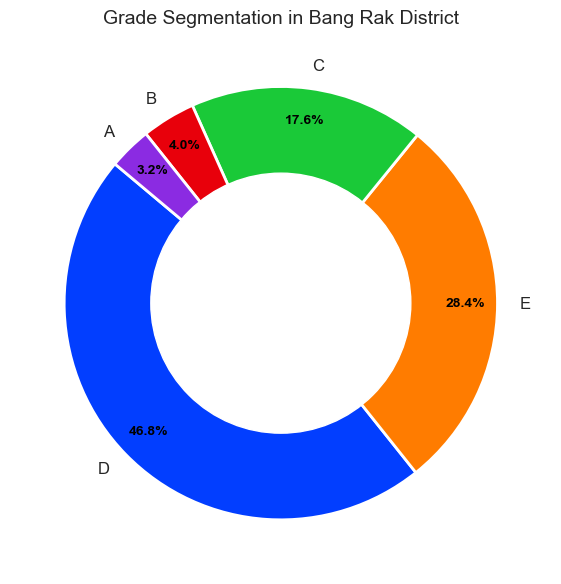

In [1785]:
sns.set(style="whitegrid")

# Membuat donut chart dengan jarak antar wedge
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    grade_counts_bangrak, 
    labels=grade_counts_bangrak.index, 
    autopct=lambda pct: f'{pct:.1f}%',  # Menampilkan persentase saja
    startangle=140, 
    colors=sns.color_palette("bright"),  # Menggunakan palet warna yang lebih mencolok
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Menambahkan garis tepi berwarna putih untuk pemisahan
    pctdistance=0.85  # Menempatkan persentase lebih dalam
)

# Membuat lingkaran di tengah untuk menjadikannya donut chart, dengan ukuran yang lebih kecil
centre_circle = plt.Circle((0, 0), 0.60, fc='white')  # Ukuran lingkaran diperkecil agar donut lebih tebal
plt.gca().add_artist(centre_circle)

# Mengatur tampilan label dan persentase
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.setp(texts, size=12)

# Menambahkan judul dalam bahasa Inggris
plt.title('Grade Segmentation in Bang Rak District', fontsize=14)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [1786]:
grade_counts_bangrak = bangrak_segmentation['Grade_BangRak'].value_counts()
grade_counts_bangrak_sorted = grade_counts_bangrak.sort_index()
grade_counts_bangrak_sorted.reset_index()

Grade_BangRak  count
0             A     19
1             B     24
2             C    105
3             D    280
4             E    170

**`Insight`**

Listing terbanyak pada Distrik Bang RaK terdapat memiliki grade D dan E, kemudian yang paling sedikit memiliki grade A. Artinya lebih banyak listing yang kualitasnya belum memadai untuk turis di distrik ini. Preferensi untuk penginapan grade A sangat sedikit, paling banyak hanya preferensi untuk grade D dan E.

### **Jumlah Listing Berdasarkan Room Type di Distrik Bang Rak**

<Figure size 1000x600 with 0 Axes>

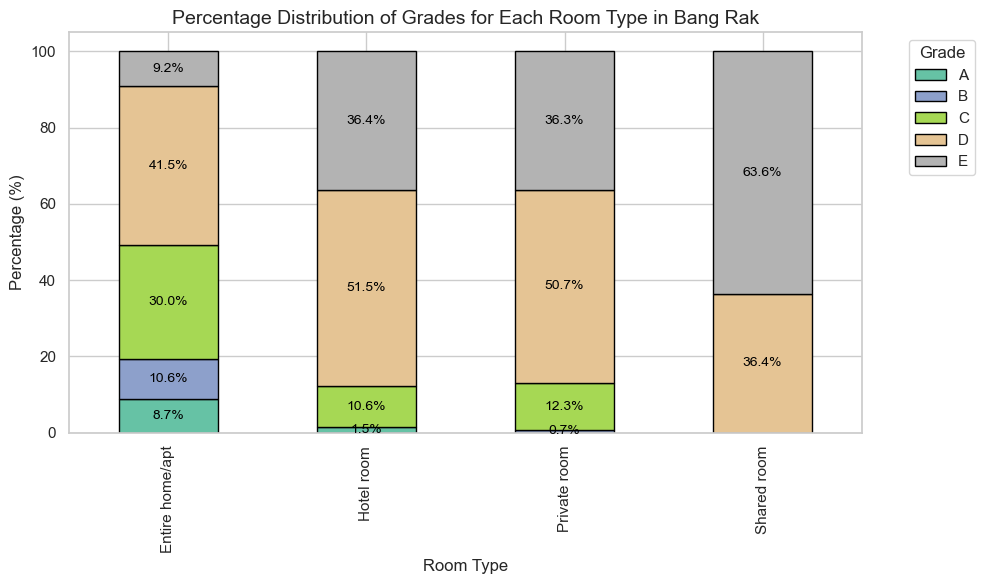

In [1787]:
grade_counts_per_room_bangrak_total = bangrak_segmentation.groupby(['room_type', 'Grade_BangRak']).size().unstack(fill_value=0)

# Menghitung persentase untuk membuat stacked bar chart 100 persen
grade_counts_per_room_bangrak = grade_counts_per_room_bangrak_total.div(grade_counts_per_room_bangrak_total.sum(axis=1), axis=0) * 100


# Menggunakan palet warna yang lebih cerah
plt.figure(figsize=(10, 6))
ax = grade_counts_per_room_bangrak.plot(
    kind='bar', 
    stacked=True, 
    colormap='Set2',  # Menggunakan palet warna 'Set2' yang lebih cerah
    edgecolor='black', 
    figsize=(10, 6)
)

# Menambahkan judul dan label
plt.title('Percentage Distribution of Grades for Each Room Type in Bang Rak', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan label persentase pada batang
for i in range(grade_counts_per_room_bangrak.shape[0]):
    cumulative_percentage = 0
    for j in range(grade_counts_per_room_bangrak.shape[1]):
        percentage = grade_counts_per_room_bangrak.iloc[i, j]
        if percentage > 0:  # Menampilkan label hanya jika persentase lebih dari 0
            ax.text(i, cumulative_percentage + percentage / 2, 
                    f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative_percentage += percentage
        
# Menampilkan grafik
plt.tight_layout()
plt.show()


In [1788]:
grade_counts_per_room_bangrak_total['Total Listings'] = grade_counts_per_room_bangrak_total.sum(axis=1)
grade_counts_per_room_bangrak_total

Grade_BangRak     A   B   C    D    E  Total Listings
room_type                                            
Entire home/apt  18  22  62   86   19             207
Hotel room        1   0   7   34   24              66
Private room      0   2  36  148  106             292
Shared room       0   0   0   12   21              33

**`Insight`**

Berdasarkan tipe kamar, Pada distrik ini listing terbanyak dimiliki oleh tipe kamar private room dan yang paling sedikit adalah tipe kamar shared room. Untuk grade yang paling lengkap terdapat pada tipe kamar entire/room, artinya lebih banyak preferensi pemilihan penginapan di tipe kamar ini. Sementara preferensi penginapan paling sedikit berdasarkan grade adalah tipe kamar shared room.

### **Shared Room**

In [1789]:
def sample_10_shared_room(data):
    shared_room_data = data[data['room_type'] == 'Shared room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_shared_bangrak = shared_room_data.sort_values(by='Grade_BangRak', ascending=True).groupby('Grade_BangRak').head(10)
    return sampled_10_shared_bangrak[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_BangRak']]

# Get sampled 10 shared rooms
sampled_shared_bangrak_room = sample_10_shared_room(bangrak_segmentation)
print("Sampled 10 Shared Rooms:")
sampled_shared_bangrak_room

Sampled 10 Shared Rooms:


name    room_type  \
932                   Single Bed Capsule @The Cube Hostel  Shared room   
3182   HOFT Hostel 5 Mins from BTS : 1-B in 8-B FEMALE Rm  Shared room   
3180    HOFT Hostel 5 Mins from BTS : 1-B in 6-B Mixed Rm  Shared room   
3179   HOFT Hostel 5 Mins from BTS : 1-B in 6-B FEMALE Rm  Shared room   
3177    HOFT Hostel 5 Mins from BTS : 1-Bed in Mixed Dorm  Shared room   
3011      Home Mali Hostel at Hua Lamphong Single in Dorm  Shared room   
2983          Family room near Hua Lamphong train station  Shared room   
3457       TiniKati Hostel, 4-bed Mixed Dorm, Shared Bath  Shared room   
3758    8 Bed mixed dormitory near BTS sky train at Silom  Shared room   
4790   Private Cabin ～ Chamberlain Boutique House (有接机服务）  Shared room   
4205      4 Bed mixed dormitory at Good’uck Hostel, Silom  Shared room   
4093   Ideal location 8-bed room with private bathroomA/C  Shared room   
5043                 10 Single Beds Mixed Shared Bathroom  Shared room   
6670                    4- bed dorm with shared bathrooms  Shared room   
8207                                All we need is hostel  Shared room   
4073   Ideal location 8-bed room with private bathroomA/C  Shared room   
10177  8-Bed Male Dormitory Room, Close to Silom, Bangkok  Shared room   
4204     4 Bed Female Dormitory at Good'uck Hostel, Silom  Shared room   
3181    HOFT Hostel 5 Mins from BTS : 1-B in 8-B Mixed Rm  Shared room   
11039   Hostel Offers Private Room for 1 with Shared Bath  Shared room   

       longitude  latitude maximum_capacity Grade_BangRak  
932    100.53540  13.72745           (2, 6)             D  
3182   100.52366  13.72834           (2, 6)             D  
3180   100.52512  13.72776           (2, 6)             D  
3179   100.52396  13.72858           (2, 6)             D  
3177   100.52374  13.72623           (2, 6)             D  
3011   100.51946  13.73385           (2, 6)             D  
2983   100.52122  13.73269           (2, 6)             D  
3457   100.53127  13.72684           (2, 6)             D  
3758   100.52309  13.72413           (2, 6)             D  
4790   100.51772  13.72106           (2, 6)             D  
4205   100.52364  13.72444           (2, 6)             E  
4093   100.52087  13.72624           (2, 6)             E  
5043   100.53134  13.72562           (2, 6)             E  
6670   100.51947  13.72215           (2, 6)             E  
8207   100.52410  13.72327           (2, 6)             E  
4073   100.52091  13.72623           (2, 6)             E  
10177  100.52725  13.72796           (2, 6)             E  
4204   100.52150  13.72481           (2, 6)             E  
3181   100.52310  13.72695           (2, 6)             E  
11039  100.52815  13.72464           (2, 6)             E

### **Private Room**

In [1790]:
def sample_10_private_room(data):
    private_room_data = data[data['room_type'] == 'Private room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_private_bangrak = private_room_data.sort_values(by='Grade_BangRak', ascending=True).groupby('Grade_BangRak').head(10)
    return sampled_10_private_bangrak[['name', 'room_type', 'longitude', 'latitude', 'maximum_capacity','Grade_BangRak']]

# Get sampled 10 private rooms
sampled_private_bangrak_room = sample_10_private_room(bangrak_segmentation)
print("Sampled 10 Private Rooms:")
sampled_private_bangrak_room

Sampled 10 Private Rooms:


name     room_type  \
13177                     1 Bedroom Suite [Silom-Sathorn]  Private room   
9001          Spacious 3 bedroom apartment Bangkok Center  Private room   
10243                   Silom-Sathon Bangkok Location 204  Private room   
5040      Le Vanvarothai - 2bedroom (Saladaeng Residence)  Private room   
11954  Superior, 2 min from Skytrain ,Pet Friendly, SHA +  Private room   
2022     5mins to Skytrain/lebua Suite CityView/Breakfast  Private room   
2040    Luxury River View/Lounge Access/5mins to Skytrain  Private room   
6109   Luxury River View/Daily Breakfast/5min to Skytrain  Private room   
2436   公寓 Comfy&Value Stay @Silom Soi 3 (BTS Saladaeng)#1  Private room   
6110              5mins to Skytrain/lebua Suite RiverView  Private room   
6108   Luxury City View/Daily Breakfast/5mins to Skytrain  Private room   
2659   公寓 Comfy&Value Stay @Silom Soi 3 (BTS Saladaeng)#3  Private room   
5708                Studio at LUXX XL Langsuan (17 of 30)  Private room   
7460                                i-Sanook Bangkok King  Private room   
6883              Ideal location, Private double room fan  Private room   
5706                Studio at LUXX XL Langsuan (15 of 30)  Private room   
6867                                         Ben's Tavern  Private room   
7630     1 BDR in Silom, Rooftop Duplex room, 450m to BTS  Private room   
7806                     Condominium For Rent and Selling  Private room   
8057                                Niamh M Perkins house  Private room   
8291             Anonymous Common House - The Himba Tribe  Private room   
8817                                     Silom City Hotel  Private room   
2821   Loftel Station - Private Family room 6 people -BKK  Private room   
14088               BKK, Silom all-suite 3 bedrooms hotel  Private room   
14877            SO Bright : A convenient room in Sathorn  Private room   
15661                  Deluxe Private Room for 2 near BTS  Private room   
11011       (302) Cozy room, Close to BTS , Good location  Private room   
11155  Budgeted Bangkok Long Stay near ChaoPharaya Cruise  Private room   
11009       (402) Cozy room, Close to BTS , Good location  Private room   
14905  150sqm. Penthouse in the heart of Bangkok Surawong  Private room   
10951       (504) Cozy room, Close to BTS , Good location  Private room   
2443   Urban Hostel - Superior Double Room (Private Bath)  Private room   

        longitude   latitude maximum_capacity Grade_BangRak  
13177  100.538228  13.725810           (1, 2)             B  
9001   100.529450  13.725640           (1, 2)             B  
10243  100.528860  13.723050           (1, 2)             C  
5040   100.537430  13.726973           (1, 2)             C  
11954  100.517320  13.718180           (1, 2)             C  
2022   100.516830  13.721510           (1, 2)             C  
2040   100.515790  13.722350           (1, 2)             C  
6109   100.517212  13.721205           (1, 2)             C  
2436   100.530170  13.727200           (1, 2)             C  
6110   100.517770  13.720120           (1, 2)             C  
6108   100.516884  13.721257           (1, 2)             C  
2659   100.530650  13.725070           (1, 2)             C  
5708   100.528230  13.731250           (1, 2)             D  
7460   100.521230  13.731670           (1, 2)             D  
6883   100.520770  13.727280           (1, 2)             D  
5706   100.530490  13.730440           (1, 2)             D  
6867   100.516410  13.722840           (1, 2)             D  
7630   100.521040  13.721700           (1, 2)             D  
7806   100.527400  13.725120           (1, 2)             D  
8057   100.516740  13.720380           (1, 2)             D  
8291   100.524830  13.723180           (1, 2)             D  
8817   100.522870  13.726930           (1, 2)             D  
2821   100.518080  13.736040           (1, 2)             E  
14088  100.515790  13.720660           (1, 2)             E  
14877  100.521760  13.72569

### **Entire Home/Apt**

In [1791]:
def sample_10_entire_room(data):
    # Filter data for 'Shared room'
    entire_room_data = data[data['room_type'] == 'Entire home/apt']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_entire_bangrak = entire_room_data.sort_values(by='Grade_BangRak', ascending=True).groupby('Grade_BangRak').head(10)
    return sampled_10_entire_bangrak[['name', 'room_type', 'longitude', 'latitude', 'maximum_capacity','Grade_BangRak']]

# Get sampled 10 entire rooms
sampled_entire_bangrak_room = sample_10_entire_room(bangrak_segmentation)
print("Sampled 10 Entire Home/Apt:")
sampled_entire_bangrak_room

Sampled 10 Entire Home/Apt:


name        room_type  \
5313   Nice spacious 3 bedrooms city center near skytrain  Entire home/apt   
4658     Spacious 3 Bed Room at City Center near SkyTrain  Entire home/apt   
4198        2.SALADAENG 1 ALLEY, BTS/MRT Silom-Siam  WiFi  Entire home/apt   
5543       ❤️HIGH FLOOR❤️StateTower-New RoomWifiWashmachi  Entire home/apt   
3734     Spacious 3 bedrooms very close to sky train-11CS  Entire home/apt   
12047      CBD 3BR SPACIOUS SUITE 1MinBTS FreeWIFI 215sqm  Entire home/apt   
2996                      Luxury  3 bedrooms BTS BRT-11DN  Entire home/apt   
6392   TOP LUXURY CBD 215sqm 1Mins Skytrain FreeWIFI+POOL  Entire home/apt   
11835  Designer Loft with Stunning RiverView Free Pick-Up  Entire home/apt   
6645    5-Stars New&Luxury, Pano Riverview, 5 mins to BTS  Entire home/apt   
4511              Mid Town Condo 3 bedrooms near Skytrain  Entire home/apt   
3376              Bangkok best  215 sqm for 6 people-11CW  Entire home/apt   
3815              City center luxury 3 bedroom /sky train  Entire home/apt   
3364             Classic Nouveau Apartment Silom Air3nity  Entire home/apt   
5664        ❤️HOT PRO❤️ New@STATETOWER ,Sky Bar,Washchine  Entire home/apt   
8290       Anonymous Common House - The Aviator (Jacuzzi)  Entire home/apt   
9560   World Famous View! Luxurious 5⭐ Boat/Train/Markets  Entire home/apt   
2937         Children’s Way  “Air3nity” Family’s Friendly  Entire home/apt   
11880    Timeless Escape Samyan near Silom, Siam, MRT/BTS  Entire home/apt   
166               Elegant 2-Brm Condo in Heart of Bangkok  Entire home/apt   
9175    Vintage 3BR @ OldTown~Pool/Boat/Train/Street Food  Entire home/apt   
12175      Clean 175sqm 3Bdr Fast Wifi CBD 1mins Skytrain  Entire home/apt   
10563   NEW! SPARKLE LUXURY -3FLOORS 6BR- 1 min BTS SILOM  Entire home/apt   
5752    Luxury High-Fl Room with View & 3 min to Skytrain  Entire home/apt   
12555  New spacious 2BR 3PPL with pool&gym Silom &Sathorn  Entire home/apt   
10559       NEW! Modern LUXURY 2BR - 1 min walk BTS SILOM  Entire home/apt   
8580    HAPPYHAPPY SILOM apartment(2ways Airport pickups)  Entire home/apt   
12130       LIEW II - Stepping garden room -  4min to MRT  Entire home/apt   
7582    83 siam fandee suites Bangkok (Sap/Surawong Road)  Entire home/apt   
8577          HAPPYHAPPY SILOM apartment(BTS Chongnonsri)  Entire home/apt   
10494  NEW☆ 2BR SuperB SPARKLING LUXURY - BTS Chong Nonsi  Entire home/apt   
10272   FINE HOME Silom apartment4fl(Surasak station BTS)  Entire home/apt   
10339  NEW! 2BR SuperB SPARKLING LUXURY - BTS Chong Nonsi  Entire home/apt   
10457  NEW! 2BR SuperB SPARKLING LUXURY - BTS Chong Nonsi  Entire home/apt   
10440   AMAZING! - LUXURY @ SILOM - 1 min bts Chong Nonsi  Entire home/apt   
11289          SO Simple Studio in Silom area BTS Surasak  Entire home/apt   
71                    Inn Saladaeng - Superior hotel room  Entire home/apt   
11294   Baby Elephant : Adorable room close to Silom road  Entire home/apt   
15486  Luxurious Jacuzzi & River View in Old Town 180 Sqm  Entire home/apt   
15298       High-Fl Room with River view, Central Bangkok  Entire home/apt   
15493                          Enjoy the heart of Bangkok  Entire home/apt   
14878           SO Shine : A room near Siam, city centers  Entire home/apt   
15344                     1bedroom serviced apt near park  Entire home/apt   
12363   SO Lively : A tidy room with pantry in Silom area  Entire home/apt   
13724    Silom 3 apartment no. 11 (BTS Saladaeng station)  Entire home/apt   
13721     Silom 3 apartment no. 9 (BTS Saladaeng station)  Entire home/apt   
13720     Silom 3 apartment no. 8 (BTS Saladaeng station)  Entire home/apt   
5926                                  Chimelong Apartment  Entire home/apt   
11398  Deer Family : Family lovely place among Silom area  Entire home/apt   
11395   Elephant Family : Family friendly with Free Wi-Fi  Entire home/apt   

       longitude  latitude maximum_capacity Grade_BangRak  
5313   100.531

### **Hotel Room**

In [1792]:
def sample_10_hotel_room(data):
    hotel_room_data = data[data['room_type'] == 'Hotel room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_hotel_bangrak = hotel_room_data.sort_values(by='Grade_BangRak', ascending=True).groupby('Grade_BangRak').head(10)
    return sampled_10_hotel_bangrak[['name', 'room_type', 'longitude', 'latitude', 'maximum_capacity','Grade_BangRak']]

# Get sampled 10 hotel rooms
sampled_hotel_bangrak_room = sample_10_hotel_room(bangrak_segmentation)
print("Sampled 10 Hotel Room:")
sampled_hotel_bangrak_room

Sampled 10 Hotel Room:


name   room_type  \
2950          Bangkok best holiday Spacious 3BR, BTS,BRT  Hotel room   
2038    Luxury City View/Lounge Access/5mins to Skytrain  Hotel room   
4457  2B Spacious, good for familly, near Silom MRT &BTS  Hotel room   
4355  80 sqm serviced apt@Silom: 5 min walk to BTS & MRT  Hotel room   
7572  CozyRoom/Private/(3-4pp)/BTS7Min/Silom/Sathorn/New  Hotel room   
7571   Cozy Room/Private/(2pp)/BTS7Min/Silom/Sathorn/New  Hotel room   
7570   Cozy Room/Private/(2pp)/BTS7Min/Silom/Sathorn/New  Hotel room   
6512  Delightful Classical Superior near Chaopraya River  Hotel room   
1817     Silom 3 apartment no. 5 (BTS Saladaeng station)  Hotel room   
5684  1 bedroom with Zen garden view (44sqm), LUXX Silom  Hotel room   
8856              Heaven Hostel - Deluxe Double-Bed Room  Hotel room   
6232    Superior Room Only - Oriental Heritage Residence  Hotel room   
6364  Newly renovated Colonial House near Silom/Yaowarat  Hotel room   
6486     Enchanting Classical Room near Skytrain Station  Hotel room   
6517           Luxurious Royal Suite - Boutique of Silom  Hotel room   
6515     Classical Suite near Siam Paragon and Icon Siam  Hotel room   
5683  1 bedroom with Zen garden view (56sqm), LUXX Silom  Hotel room   
7301   Peaceful Spacious 1 Bedroom Private Room at Silom  Hotel room   
8855                   Heaven Hostel - Twin-Bed Room (S)  Hotel room   
5680    Compact Studio room (24sqm) in Silom, LUXX Silom  Hotel room   
8826                 Heaven Hostel - Double-Bed Room (L)  Hotel room   
8798      Silom City Hotel Bangkok_Deluxe Room Breakfast  Hotel room   
8797           Silom City Hotel Bangkok_Deluxe Room Only  Hotel room   
8785              Silom City Hotel Bangkok_Superior Room  Hotel room   
8554                 Deluxe room -King Bed ( Room Only )  Hotel room   
8462             Superior Room Double Bed  ( Room Only )  Hotel room   
5681     Studio with Zen garden view (30sqm), LUXX Silom  Hotel room   
8151                                 8 Beds Female  Dorm  Hotel room   

       longitude   latitude maximum_capacity Grade_BangRak  
2950  100.530660  13.724660           (1, 4)             A  
2038  100.516907  13.721525           (1, 4)             C  
4457  100.538910  13.728270           (1, 4)             C  
4355  100.537520  13.726500           (1, 4)             C  
7572  100.523310  13.723330           (1, 4)             C  
7571  100.523310  13.723330           (1, 4)             C  
7570  100.523310  13.723330           (1, 4)             C  
6512  100.521800  13.722250           (1, 4)             C  
1817  100.530190  13.726310           (1, 4)             D  
5684  100.526460  13.726800           (1, 4)             D  
8856  100.535650  13.727080           (1, 4)             D  
6232  100.515410  13.726950           (1, 4)             D  
6364  100.520080  13.723680           (1, 4)             D  
6486  100.521610  13.723110           (1, 4)             D  
6517  100.520668  13.722693           (1, 4)             D  
6515  100.519710  13.723380           (1, 4)             D  
5683  100.526160  13.725810           (1, 4)             D  
7301  100.533060  13.723760           (1, 4)             D  
8855  100.535640  13.727450           (1, 4)             E  
5680  100.526420  13.725390           (1, 4)             E  
8826  100.535850  13.727040           (1, 4)             E  
8798  100.523450  13.724590           (1, 4)             E  
8797  100.521590  13.726720           (1, 4)             E  
8785  100.523500  13.725510           (1, 4)             E  
8554  100.516320  13.718390           (1, 4)             E  
8462  100.517120  13.718400           (1, 4)             E  
5681  100.526460  13.725650           (1, 4)             E  
8151  100.525780  13.727100           (1, 4)             E

# **Rekomendasi Penginapan di Parthum Wan**

### **Segmentasi di Distrik Parthum Wan**

In [1821]:
criteria_district_parthumwan = {
    'price_thresholds': {'high': 4364.5, 'medium': 2997.5},
    'review_thresholds': {'high': 19, 'medium': 2.5},
    'additional_criteria_minimum': {'A':  2, 'B': 1, 'C': 0},
    'keywords_accessibility': ['bts', 'mrt', 'near', 'min', 'walk', 'mins', 'station', 'airport', 'close', 'skytrain'],
    'keywords_promo': ['free', 'breakfast'],
    'keywords_facilities': ['pool', 'wifi', 'gym', 'rooftop', 'park'],
    'keywords_esthetics': ['new', 'cozy', 'luxury', 'view', 'spacious', 'modern', 'big', 'clean', 'lovely', 'comfy', 'nice']
}
# Contoh DataFrame untuk data akomodasi di berbagai distrik
parthumwan_segmentation = pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Parthum Wan'].copy()

# Menerapkan fungsi grading untuk menentukan grade di distrik Bang Rak
parthumwan_segmentation.loc[:, 'Grade_ParthumWan'] = parthumwan_segmentation.apply(grade_accommodation, axis=1, city_criteria=criteria_district_parthumwan)

# Menampilkan DataFrame yang sudah difilter dan diberi grade
parthumwan_segmentation.to_csv('airbnb_bangkok_parthumwan.csv', index=False)
parthumwan_segmentation

name     district  \
327                   Prime location,near BTS Ratchadamri  Parthum Wan   
352    Cozy 1BR freeWifi at BTSChidlom near Erawan shrine  Parthum Wan   
360       68sqm Cozy city view 1BR 2mins walk BTS Chidlom  Parthum Wan   
385                   Clean Comfy at Chidlom 2 mins toBTS  Parthum Wan   
409                         The AETAS Hotels & Residences  Parthum Wan   
...                                                   ...          ...   
15625                                           Ci home 5  Parthum Wan   
15626                                           Ci home 6  Parthum Wan   
15679                                        Ci Home four  Parthum Wan   
15699             4F Deluxe Room 2/3 Beds\nBy the Station  Parthum Wan   
15735                   The Residences at Kempinski Hotel  Parthum Wan   

        latitude   longitude        room_type  price  minimum_nights  \
327    13.739540  100.539540  Entire home/apt   1351               1   
352    13.744440  100.544090  Entire home/apt   3436               1   
360    13.743730  100.542570  Entire home/apt   3343               1   
385    13.744680  100.543000     Private room   1586               1   
409    13.741240  100.533520  Entire home/apt   4258               1   
...          ...         ...              ...    ...             ...   
15625  13.739350  100.519420     Private room   1100               1   
15626  13.739260  100.519640     Private room   1236               1   
15679  13.737240  100.519760     Private room   1350               1   
15699  13.747444  100.529396     Private room    960               1   
15735  13.739279  100.544462  Entire home/apt   5900               3   

       number_of_reviews                                     keywords  \
327                   53                                aksesibilitas   
352                   19  aksesibilitas, promosi, fasilitas, estetika   
360                   25                      aksesibilitas, estetika   
385                   15                      aksesibilitas, estetika   
409                    0                       tidak memakai keywords   
...                  ...                                          ...   
15625                  1                       tidak memakai keywords   
15626                  0                       tidak memakai keywords   
15679                  0                       tidak memakai keywords   
15699                  0                                aksesibilitas   
15735                  0                       tidak memakai keywords   

      maximum_capacity Grade_ParthumWan  
327            (8, 12)                D  
352            (8, 12)                C  
360            (8, 12)                C  
385             (1, 2)                D  
409            (8, 12)                D  
...                ...              ...  
15625           (1, 2)                E  
15626           (1, 2)                E  
15679           (1, 2)                E  
15699           (1, 2)                E  
15735          (8, 12)                E  

[298 rows x 11 columns]

### **Jumlah Listing Berdasarkan Grade di Distrik Parthum Wan**

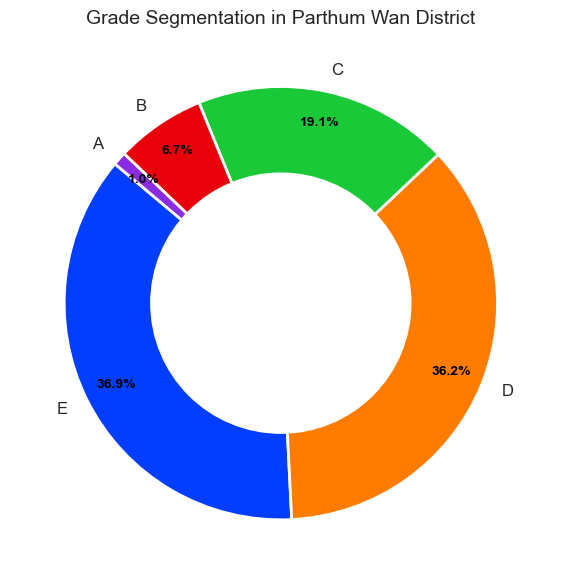

In [1794]:
sns.set(style="whitegrid")

# Membuat donut chart dengan jarak antar wedge
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    grade_counts_parthumwan, 
    labels=grade_counts_parthumwan.index, 
    autopct=lambda pct: f'{pct:.1f}%',  # Menampilkan persentase saja
    startangle=140, 
    colors=sns.color_palette("bright"),  # Menggunakan palet warna yang lebih mencolok
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Menambahkan garis tepi berwarna putih untuk pemisahan
    pctdistance=0.85  # Menempatkan persentase lebih dalam
)

# Membuat lingkaran di tengah untuk menjadikannya donut chart, dengan ukuran yang lebih kecil
centre_circle = plt.Circle((0, 0), 0.60, fc='white')  # Ukuran lingkaran diperkecil agar donut lebih tebal
plt.gca().add_artist(centre_circle)

# Mengatur tampilan label dan persentase
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.setp(texts, size=12)

# Menambahkan judul dalam bahasa Inggris
plt.title('Grade Segmentation in Parthum Wan District', fontsize=14)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [1795]:
grade_counts_parthumwan = parthumwan_segmentation['Grade_ParthumWan'].value_counts()
grade_counts_parthumwan_sorted = grade_counts_parthumwan.sort_index()
grade_counts_parthumwan_sorted.reset_index()

Grade_ParthumWan  count
0                A      3
1                B     20
2                C     57
3                D    108
4                E    110

**`insight`**

Listing terbanyak pada Distrik Parthum Wan terdapat memiliki grade D dan E, kemudian yang paling sedikit memiliki grade A. Artinya lebih banyak listing yang kualitasnya belum memadai untuk turis di distrik ini. Preferensi untuk penginapan grade A sangat sedikit, paling banyak hanya preferensi untuk grade D dan E.

### **Jumlah Listing Berdasarkan Room Type di Distrik Parthum Wan**

<Figure size 1000x600 with 0 Axes>

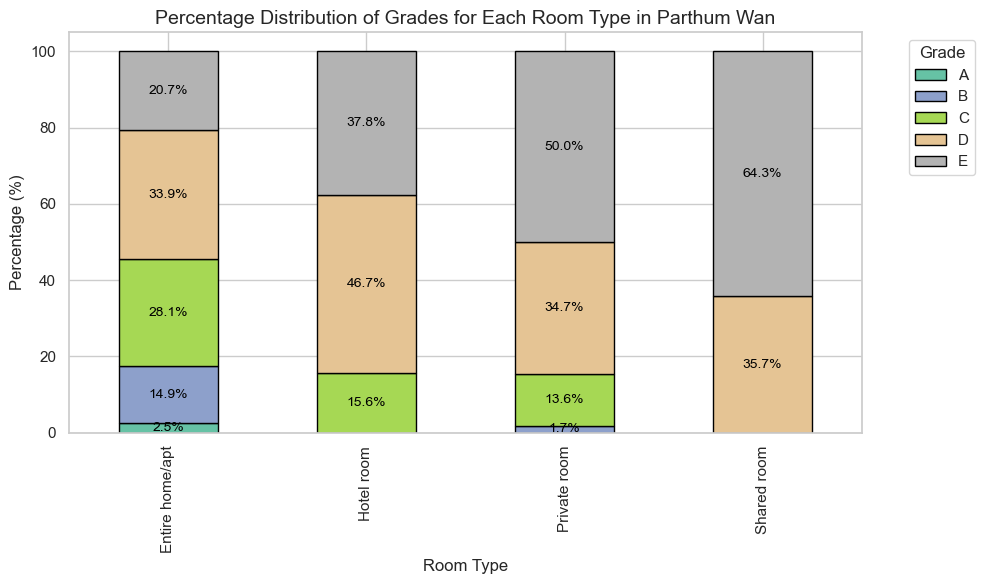

In [1796]:
grade_counts_per_room_parthumwan_total = parthumwan_segmentation.groupby(['room_type', 'Grade_ParthumWan']).size().unstack(fill_value=0)

# Menghitung persentase untuk membuat stacked bar chart 100 persen
grade_counts_per_room_parthumwan = grade_counts_per_room_parthumwan_total.div(grade_counts_per_room_parthumwan_total.sum(axis=1), axis=0) * 100

# Menggunakan palet warna yang lebih cerah
plt.figure(figsize=(10, 6))
ax = grade_counts_per_room_parthumwan.plot(
    kind='bar', 
    stacked=True, 
    colormap='Set2',  # Menggunakan palet warna 'Set2' yang lebih cerah
    edgecolor='black', 
    figsize=(10, 6)
)

# Menambahkan judul dan label
plt.title('Percentage Distribution of Grades for Each Room Type in Parthum Wan', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan label persentase pada batang
for i in range(grade_counts_per_room_parthumwan.shape[0]):
    cumulative_percentage = 0
    for j in range(grade_counts_per_room_parthumwan.shape[1]):
        percentage = grade_counts_per_room_parthumwan.iloc[i, j]
        if percentage > 0:  # Menampilkan label hanya jika persentase lebih dari 0
            ax.text(i, cumulative_percentage + percentage / 2, 
                    f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative_percentage += percentage
        
# Menampilkan grafik
plt.tight_layout()
plt.show()

In [1797]:
grade_counts_per_room_parthumwan_total['Total Listings'] = grade_counts_per_room_parthumwan_total.sum(axis=1)
grade_counts_per_room_parthumwan_total

Grade_ParthumWan  A   B   C   D   E  Total Listings
room_type                                          
Entire home/apt   3  18  34  41  25             121
Hotel room        0   0   7  21  17              45
Private room      0   2  16  41  59             118
Shared room       0   0   0   5   9              14

**`insight`**

Berdasarkan tipe kamar, Pada distrik ini listing terbanyak dimiliki oleh tipe kamar private room dan yang paling sedikit adalah tipe kamar shared room. Untuk grade yang paling lengkap terdapat pada tipe kamar entire/room, artinya lebih banyak preferensi pemilihan penginapan di tipe kamar ini. Sementara preferensi penginapan paling sedikit berdasarkan grade adalah tipe kamar shared room.


### **Shared Room**

In [1798]:
def sample_10_shared_room(data):
    shared_room_data = data[data['room_type'] == 'Shared room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_shared_parthumwan = shared_room_data.sort_values(by='Grade_ParthumWan', ascending=True).groupby('Grade_ParthumWan').head(10)
    return sampled_10_shared_parthumwan[['name', 'room_type', 'longitude', 'latitude', 'maximum_capacity','Grade_ParthumWan']]

# Get sampled 10 shared rooms
sampled_shared_parthumwan_room = sample_10_shared_room(parthumwan_segmentation)
print("Sampled 10 Shared Rooms:")
sampled_shared_parthumwan_room

Sampled 10 Shared Rooms:


name    room_type  \
2728                                  Inn Stations Hostel  Shared room   
5777      5 mins to MBK mall Siam Bangkok 4-6 people room  Shared room   
5938   5 mins to MBK mall & bts train room 4- 6 ppl group  Shared room   
9176                          The Hat Trick Hostel จุฬา12  Shared room   
9177                          The Hat Trick Hostel จุฬา12  Shared room   
1702    Loftel Station Hostel- Mixed Dormitory 6 beds-BKK  Shared room   
2003                       Banthat Thong Hostel, near BTS  Shared room   
6348             Female Bangkok safe stay 4-6 people room  Shared room   
7857     72+ ppl stay in siam hostel in middle of bangkok  Shared room   
9814        ห้องรวมหญิง  เตียงสองชั้น The Hattrick Hostel  Shared room   
9824          ห้องรวมชาย เตียงสองชั้น The Hattrick Hostel  Shared room   
9993   Shared space in commercial complex + subway access  Shared room   
14107                 168 Hostel : Best hostel of bangkok  Shared room   
14138                 168 Hostel , near Siam Square & MBK  Shared room   

       longitude  latitude maximum_capacity Grade_ParthumWan  
2728   100.51808  13.73757           (2, 6)                D  
5777   100.52584  13.74805           (2, 6)                D  
5938   100.52557  13.74627           (2, 6)                D  
9176   100.52512  13.74557           (2, 6)                D  
9177   100.52316  13.74502           (2, 6)                D  
1702   100.51975  13.73708           (2, 6)                E  
2003   100.52245  13.73930           (2, 6)                E  
6348   100.52543  13.74761           (2, 6)                E  
7857   100.52394  13.74759           (2, 6)                E  
9814   100.52330  13.74464           (2, 6)                E  
9824   100.52328  13.74468           (2, 6)                E  
9993   100.52915  13.73601           (2, 6)                E  
14107  100.52424  13.74570           (2, 6)                E  
14138  100.52251  13.74584           (2, 6)                E

### **Private Room**

In [1799]:
def sample_10_private_room(data):
    private_room_data = data[data['room_type'] == 'Private room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_private_parthumwan = private_room_data.sort_values(by='Grade_ParthumWan', ascending=True).groupby('Grade_ParthumWan').head(10)
    return sampled_10_private_parthumwan[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_ParthumWan']]

# Get sampled 10 private rooms
sampled_private_parthumwan_room = sample_10_private_room(parthumwan_segmentation)
print("Sampled 10 Private Rooms:")
sampled_private_parthumwan_room

Sampled 10 Private Rooms:


name  \
3907                                                                                                                                                                                                       Boutique Suite With Living Area in LUXX XL Langsuan Hotel   
12119                                                                                                                                                                                                                           TAMNI | No.301 | 1min walk to Subway   
12207                                                                                                                                                                                                                           TAMNI | No.303 | 1min walk to Subway   
4838                                                             One BR Premiere RB · One BR Premiere RB · One BR Premiere RB · One BR Premiere RB · One BR Premiere RB · One BR Premiere RB · One BR Premiere RB · 48 sqm-Suite with Balcony plus ABF-BTS Ploenchit   
5537                                                                          Superior RO · Superior RO · Superior RO · Superior RO · Superior RO · Superior RO · Superior RO · Superior RO · Superior RO · Superior RO · 39 sqm- fully equipped Suite BTS Ploenchit   
3911                                                                                                                                                                                                                              Head Into Bangkok From a Chic Home   
6211                                                                                                                                                                                                                             4BR 10 Guest CBD Near BTS Ploenchit   
12121                                                                                                                                                                                                                           TAMNI | No.305 | 1min walk to Subway   
1984                                                                                                                                                                                                                            (203A)Feel at home Spacious 2 BR Apt   
12213                                                                                                                                                                                                                           TAMNI | No.313 | 1min walk to Subway   
5074   1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 1 BR Deluxe with ABF · 45 sqm-Suite City View plus ABF -BTS Ploenchit   
12248                                                                                                                                                                                                                           TAMNI | No.302 | 1min walk to Subway   
14455                                                                                                                                                                                                                          Lovely studion, 28 sqm - central area   
7104                                                                                                                                                                                                                 5 Beds & Private Bathroom 200 m from subway MRT   
8295                                                                                                                                                                                                              Superior Room - 5 Minutes To Pratunam Market & BTS   
14683                           

### **Entire Home/Apt**

In [1800]:
def sample_10_entire_room(data):
    entire_room_data = data[data['room_type'] == 'Entire home/apt']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_entire_parthumwan = entire_room_data.sort_values(by='Grade_ParthumWan', ascending=True).groupby('Grade_ParthumWan').head(10)
    return sampled_10_entire_parthumwan[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_ParthumWan']]

# Get sampled 10 entire rooms
sampled_entire_parthumwan_room = sample_10_entire_room(parthumwan_segmentation)
print("Sampled 10 Entire Home/Apt:")
sampled_entire_parthumwan_room

Sampled 10 Entire Home/Apt:


name        room_type  \
8238     100-Year City Center Villa "Breakfast & Cleaning  Entire home/apt   
4999   ∞❤  Warm&Cozy Room ❤∞  5 mins to Siam Paragon/MBK∞  Entire home/apt   
9097   Central 2BR ※ near Chitlom BTS, Pool, Free Netflix  Entire home/apt   
2609    RARE! 2BR Duplex Next to Skytrain Central Bangkok  Entire home/apt   
11535    Walkable to Paragon - humble abode vacation home  Entire home/apt   
2963      Benviar -150sqm Two Bedroom Suite @Chitlom 6pax  Entire home/apt   
2784            SPACIOUS 3BR APT in the Heart of Bangkok!  Entire home/apt   
4972    Breezy Apt @Heart of BKK/5min walk to BTS/4-10pax  Entire home/apt   
2520    Benviar-Presidential Suite(900sqm)#6BRoom@Chitlom  Entire home/apt   
2247      Benviar - Four Bedroom Suite (300 Sqm) @Chitlom  Entire home/apt   
5265    ★Great Location & Price ★ 2B/2B /BTS/Mall/ ❤ City  Entire home/apt   
1191      Specious Green Garden with daily services, Siam  Entire home/apt   
8588    ❤  CBD Rachaprasong Shopping | 100m BTS Ploenchit  Entire home/apt   
6353   Exceptional location heart of BKK Rachaprasong/4BR  Entire home/apt   
6317           Spacious bargain 2 BR,  near Ploenchit BTS  Entire home/apt   
9139              Spacious 3 bed Apt near Chidlom Station  Entire home/apt   
8970   18 ppl, 6BR, 100m Short walk to BTS, Why stay far?  Entire home/apt   
12813       CBD BKK, 15PAX, 1min walk to BTS, Family room  Entire home/apt   
6400   Quiet, modern 2BR apartment near BTS Large kitchen  Entire home/apt   
5758   Breezy Apt2 @Heart of BKK/5min walk to BTS/4-10pax  Entire home/apt   
8943   Great price, 100m Short walk to BTS, Why stay far?  Entire home/apt   
8903       APT476 | 3rd Fl. | 2 BDR | 1min walk to Subway  Entire home/apt   
7669               Great location, 100m Short walk to BTS  Entire home/apt   
13441       2br for 5paxs near bts skytrain ratchaprasong  Entire home/apt   
13365  Luxury Perfect Condo 65sqm Center of Bkk Near Siam  Entire home/apt   
12102    Comfortable Studio BTS Ploenchit/Central Embassy  Entire home/apt   
12070            Large 3 bed apartment in Central Bangkok  Entire home/apt   
9676   F05暹罗中心四面佛/水门市场/37F pool/五星级私人电梯/3mins to BTS/中文服务  Entire home/apt   
11642                                      บ้านราชประสงค์  Entire home/apt   
9690     Friendly Host-Shopaholic Center-Photogenic Space  Entire home/apt   
11581                Large 3 bedroom apartment in Chidlom  Entire home/apt   
10675                near Central Chidlom/Chidlom station  Entire home/apt   
13362    Nana BTS Spacious 1BR W/Balcony Asok Terminal 21  Entire home/apt   
13349                                Banthat Thong Hostel  Entire home/apt   
15365    Nana BTS Spacious 1BR W/Balcony Asok Terminal 21  Entire home/apt   
13534              Family Room 2 Beds\nBy The Station 262  Entire home/apt   
14393            City center 3x2 bedroom units with patio  Entire home/apt   
15568    Nana BTS Spacious 1BR W/Balcony Asok Terminal 21  Entire home/apt   
8177     Very beautiful and comfortable with the new best  Entire home/apt   
11159        Beautiful apartment in the heart of Bangkok.  Entire home/apt   
3328                  1 bedroom 5-star Lumphini - Bangkok  Entire home/apt   
3391                     Exploring and Resting in Bangkok  Entire home/apt   
5011                              เดอะ ซี๊ด เมมโมรี่ สยาม  Entire home/apt   

        longitude   latitude maximum_capacity Grade_ParthumWan  
8238   100.551070  13.736940          (8, 12)                A  
4999   100.525470  13.741710          (8, 12)                A  
9097   100.542530  13.743680          (8, 12)                A  
2609   100.540700  13.740120          (8, 12)                B  
11535  100.528970  13.748900          (8, 12)                B  
2963   100.544930  13.738180          (8, 12)                B  
2784   100.550180  13.745470          (8, 12)                B  
4972   100.549920  13.745340          (8, 12)                B  
2520   100.545410  13.740220       

### **Hotel Room**

In [1801]:
def sample_10_hotel_room(data):
    hotel_room_data = data[data['room_type'] == 'Hotel room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_hotel_parthumwan = hotel_room_data.sort_values(by='Grade_ParthumWan', ascending=True).groupby('Grade_ParthumWan').head(10)
    return sampled_10_hotel_parthumwan[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_ParthumWan']]

# Get sampled 10 shared rooms
sampled_hotel_parthumwan_room = sample_10_hotel_room(parthumwan_segmentation)
print("Sampled 10 Hotel Room:")
sampled_hotel_parthumwan_room

Sampled 10 Hotel Room:


name   room_type  \
5538  Superior RB -Arcadia · Superior RB -Arcadia · Supe  Hotel room   
5701               Studio at LUXX XL Langsuan (10 of 30)  Hotel room   
3909             1 br Suite at LUXX XL Langsuan (8 of 8)  Hotel room   
5719               Studio at LUXX XL Langsuan (25 of 30)  Hotel room   
8320      Large Bed with Big Balcony and Outdoor Bathtub  Hotel room   
3900               Studio at LUXX XL Langsuan (12 of 30)  Hotel room   
3897               Studio at LUXX XL Langsuan (30 of 30)  Hotel room   
1257    24 HRS Front desk with Clean Family room in Siam  Hotel room   
5527  Best room close to MRT, Railway station&China Town  Hotel room   
5697                Studio at LUXX XL Langsuan (6 of 30)  Hotel room   
8591     Family and Friends Room for 10 - 2 min from MRT  Hotel room   
5703               Studio at LUXX XL Langsuan (13 of 30)  Hotel room   
3902               Studio at LUXX XL Langsuan (28 of 30)  Hotel room   
6280           Private Double Room with Private Bathroom  Hotel room   
5685      Studio L (corner) at LUXX XL Langsuan (3 of 4)  Hotel room   
3899      Studio L (corner) at LUXX XL Langsuan (2 of 4)  Hotel room   
6290           Private Single Room with Private Bathroom  Hotel room   
8322   Spacious Room Comfy Bed near BTS National Stadium  Hotel room   
5693             1 br Suite at LUXX XL Langsuan (5 of 8)  Hotel room   
5689    1 br Suite (corner) at LUXX XL Langsuan (4 of 4)  Hotel room   
5688    1 br Suite (corner) at LUXX XL Langsuan (2 of 4)  Hotel room   
5224     Quadruple Room (No Window) with shared Bathroom  Hotel room   
5475       Private twin bed for 2 people for female only  Hotel room   
5428                   Private 2 Bunked bed for 4 people  Hotel room   
5427  Private double bed  for 2 people( shared bathroom)  Hotel room   
5226   Private one bunk bed and Double bed for 4 peoples  Hotel room   
3910             1 br Suite at LUXX XL Langsuan (7 of 8)  Hotel room   

      longitude  latitude maximum_capacity Grade_ParthumWan  
5538  100.54971  13.74662           (1, 4)                C  
5701  100.54222  13.73671           (1, 4)                C  
3909  100.54094  13.73520           (1, 4)                C  
5719  100.54272  13.73682           (1, 4)                C  
8320  100.52433  13.74284           (1, 4)                C  
3900  100.54294  13.73452           (1, 4)                C  
3897  100.54118  13.73493           (1, 4)                C  
1257  100.52023  13.75063           (1, 4)                D  
5527  100.51757  13.73805           (1, 4)                D  
5697  100.54230  13.73660           (1, 4)                D  
8591  100.52705  13.73494           (1, 4)                D  
5703  100.54094  13.73635           (1, 4)                D  
3902  100.54096  13.73464           (1, 4)                D  
6280  100.52157  13.73738           (1, 4)                D  
5685  100.54253  13.73681           (1, 4)                D  
3899  100.54167  13.73675           (1, 4)                D  
6290  100.52170  13.73754           (1, 4)                D  
8322  100.52355  13.74295           (1, 4)                E  
5693  100.54105  13.73649           (1, 4)                E  
5689  100.54131  13.73509           (1, 4)                E  
5688  100.54109  13.73494           (1, 4)                E  
5224  100.53575  13.73900           (1, 4)                E  
5475  100.52203  13.74512           (1, 4)                E  
5428  100.52378  13.74326           (1, 4)                E  
5427  100.52206  13.74337           (1, 4)                E  
5226  100.52400  13.74517           (1, 4)                E  
3910  100.54084  13.73452           (1, 4)                E

# **Rekomendasi Penginapan di Phra Nakhon**

### **Segmentasi di Distrik Phra Nakhon**

In [1822]:
criteria_district_phranakhon = {
    'price_thresholds': {'high': 1999.75, 'medium': 1108},
    'review_thresholds': {'high': 10, 'medium': 2},
    'additional_criteria_minimum': {'A':  2, 'B': 1, 'C': 0},
    'keywords_accessibility': ['bts', 'mrt', 'near', 'min', 'walk', 'mins', 'station', 'airport', 'close', 'skytrain'],
    'keywords_promo': ['free', 'breakfast'],
    'keywords_facilities': ['pool', 'wifi', 'gym', 'rooftop', 'park'],
    'keywords_esthetics': ['new', 'cozy', 'luxury', 'view', 'spacious', 'modern', 'big', 'clean', 'lovely', 'comfy', 'nice']
}
# Contoh DataFrame untuk data akomodasi di berbagai distrik
phranakhon_segmentation = pusat_perayaan_festival[pusat_perayaan_festival['district'] == 'Phra Nakhon'].copy()

# Menerapkan fungsi grading untuk menentukan grade di distrik Phranakhon
phranakhon_segmentation.loc[:, 'Grade_PhraNakhon'] = phranakhon_segmentation.apply(grade_accommodation, axis=1, city_criteria=criteria_district_phranakhon)

# Menampilkan DataFrame yang sudah difilter dan diberi grade
phranakhon_segmentation.to_csv('airbnb_bangkok_phranakhon.csv', index=False)
phranakhon_segmentation

name     district  \
79                  Near Bangkok more space than urban!  Phra Nakhon   
355    Feung Nakorn Room with Breakfast in Old town BKK  Phra Nakhon   
376             2BR Family friendly B&B in old town BKK  Phra Nakhon   
378                       Triple room,Near Grand Palace  Phra Nakhon   
404    Suneta Hostel Khaosan - 1 bed in Cabin Dormitory  Phra Nakhon   
...                                                 ...          ...   
15697                      Cozy space for solo traveler  Phra Nakhon   
15719                       Khaosan DD Standard Bangkok  Phra Nakhon   
15722                          Khaosan DD Superior BKK'  Phra Nakhon   
15739                  Economy room for a solo traveler  Phra Nakhon   
15808                  Boutique room near Khaosarn Road  Phra Nakhon   

        latitude   longitude     room_type  price  minimum_nights  \
79     13.751350  100.494470   Shared room   5195               1   
355    13.747710  100.499310  Private room   3545               1   
376    13.749410  100.497190  Private room   3892               1   
378    13.747700  100.497830    Hotel room   3910               1   
404    13.759890  100.499900   Shared room    496               1   
...          ...         ...           ...    ...             ...   
15697  13.755829  100.501180  Private room    638               1   
15719  13.760287  100.497238  Private room   1078               1   
15722  13.758009  100.497058  Private room   1112               1   
15739  13.754990  100.502250  Private room    681               1   
15808  13.756073  100.501863  Private room   1500               1   

       number_of_reviews                keywords maximum_capacity  \
79                     0           aksesibilitas           (2, 6)   
355                   61                 promosi           (1, 2)   
376                    2  tidak memakai keywords           (1, 2)   
378                   10           aksesibilitas           (1, 4)   
404                   31  tidak memakai keywords           (2, 6)   
...                  ...                     ...              ...   
15697                  0                estetika           (1, 2)   
15719                  0  tidak memakai keywords           (1, 2)   
15722                  0  tidak memakai keywords           (1, 2)   
15739                  0  tidak memakai keywords           (1, 2)   
15808                  0           aksesibilitas           (1, 2)   

      Grade_PhraNakhon  
79                   D  
355                  B  
376                  C  
378                  B  
404                  D  
...                ...  
15697                E  
15719                E  
15722                D  
15739                E  
15808                D  

[610 rows x 11 columns]

### **Jumlah Listing Berdasarkan Grade di Distrik Phra Nakhon**

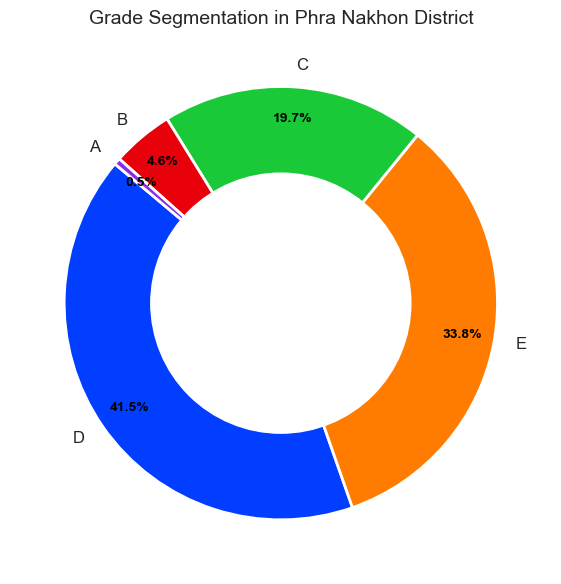

In [1803]:
sns.set(style="whitegrid")

# Membuat donut chart dengan jarak antar wedge
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    grade_counts_phranakhon, 
    labels=grade_counts_phranakhon.index, 
    autopct=lambda pct: f'{pct:.1f}%',  # Menampilkan persentase saja
    startangle=140, 
    colors=sns.color_palette("bright"),  # Menggunakan palet warna yang lebih mencolok
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Menambahkan garis tepi berwarna putih untuk pemisahan
    pctdistance=0.85  # Menempatkan persentase lebih dalam
)

# Membuat lingkaran di tengah untuk menjadikannya donut chart, dengan ukuran yang lebih kecil
centre_circle = plt.Circle((0, 0), 0.60, fc='white')  # Ukuran lingkaran diperkecil agar donut lebih tebal
plt.gca().add_artist(centre_circle)

# Mengatur tampilan label dan persentase
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.setp(texts, size=12)

# Menambahkan judul dalam bahasa Inggris
plt.title('Grade Segmentation in Phra Nakhon District', fontsize=14)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [1804]:
grade_counts_phranakhon = phranakhon_segmentation['Grade_PhraNakhon'].value_counts()
grade_counts_phranakhon_sorted = grade_counts_phranakhon.sort_index()
grade_counts_phranakhon_sorted.reset_index()

Grade_PhraNakhon  count
0                A      3
1                B     28
2                C    120
3                D    253
4                E    206

**`Insight`**

Listing terbanyak pada Distrik Parthum Wan terdapat memiliki grade D dan E, kemudian yang paling sedikit memiliki grade A. Artinya lebih banyak listing yang kualitasnya belum memadai untuk turis di distrik ini. Preferensi untuk penginapan grade A sangat sedikit, paling banyak hanya preferensi untuk grade D dan E.

### **Jumlah Listing Berdasarkan Room Type di Distrik Phra Nakhon**

<Figure size 1000x600 with 0 Axes>

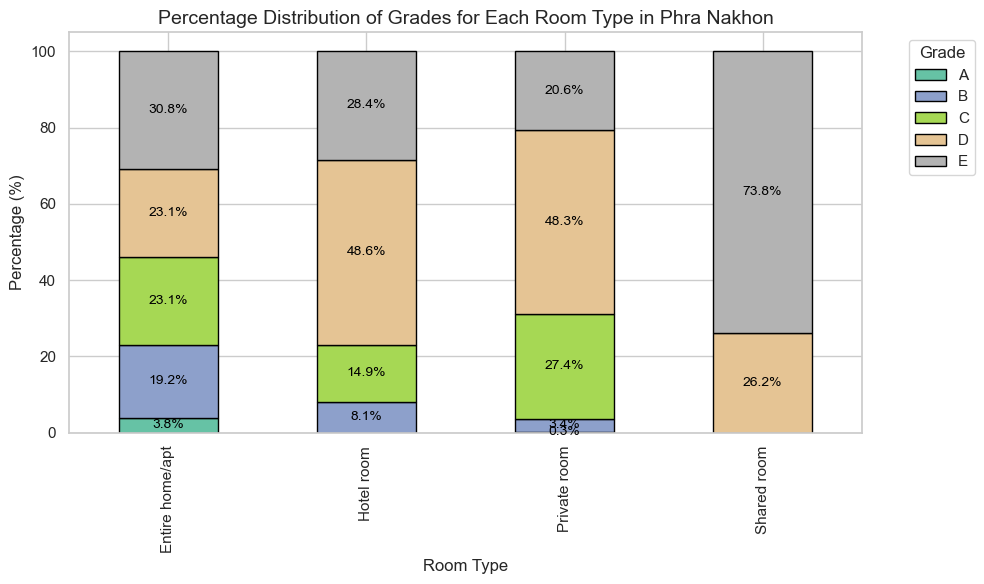

In [1805]:
grade_counts_per_room_phranakhon_total = phranakhon_segmentation.groupby(['room_type', 'Grade_PhraNakhon']).size().unstack(fill_value=0)

# Menghitung persentase untuk membuat stacked bar chart 100 persen
grade_counts_per_room_phranakhon = grade_counts_per_room_phranakhon_total.div(grade_counts_per_room_phranakhon_total.sum(axis=1), axis=0) * 100

# Menggunakan palet warna yang lebih cerah
plt.figure(figsize=(10, 6))
ax = grade_counts_per_room_phranakhon.plot(
    kind='bar', 
    stacked=True, 
    colormap='Set2',  # Menggunakan palet warna 'Set2' yang lebih cerah
    edgecolor='black', 
    figsize=(10, 6)
)

# Menambahkan judul dan label
plt.title('Percentage Distribution of Grades for Each Room Type in Phra Nakhon', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan label persentase pada batang
for i in range(grade_counts_per_room_phranakhon.shape[0]):
    cumulative_percentage = 0
    for j in range(grade_counts_per_room_phranakhon.shape[1]):
        percentage = grade_counts_per_room_phranakhon.iloc[i, j]
        if percentage > 0:  # Menampilkan label hanya jika persentase lebih dari 0
            ax.text(i, cumulative_percentage + percentage / 2, 
                    f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative_percentage += percentage
        
# Menampilkan grafik
plt.tight_layout()
plt.show()

In [1806]:
grade_counts_per_room_phranakhon_total['Total Listings'] = grade_counts_per_room_phranakhon_total.sum(axis=1)
grade_counts_per_room_phranakhon_total

Grade_PhraNakhon  A   B   C    D   E  Total Listings
room_type                                           
Entire home/apt   2  10  12   12  16              52
Hotel room        0   6  11   36  21              74
Private room      1  12  97  171  73             354
Shared room       0   0   0   34  96             130

**`Insight`**

Berdasarkan tipe kamar, Pada distrik ini listing terbanyak dimiliki oleh tipe kamar private room dan yang paling sedikit adalah tipe kamar entire home/apt. Untuk grade yang paling lengkap terdapat pada tipe kamar entire/room dan private room, artinya lebih banyak preferensi pemilihan penginapan di tipe kamar ini. Sementara preferensi penginapan paling sedikit berdasarkan grade adalah tipe kamar shared room.

### **Shared Room**

In [1807]:
def sample_10_shared_room(data):
    shared_room_data = data[data['room_type'] == 'Shared room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_shared_phranakhon = shared_room_data.sort_values(by='Grade_PhraNakhon', ascending=True).groupby('Grade_PhraNakhon').head(10)
    return sampled_10_shared_phranakhon[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_PhraNakhon']]

# Get sampled 10 shared rooms
sampled_shared_phranakhon_room = sample_10_shared_room(phranakhon_segmentation)
print("Sampled 10 Shared Rooms:")
sampled_shared_phranakhon_room

Sampled 10 Shared Rooms:


name  \
79                                                                                                                                                                           Near Bangkok more space than urban!   
4140                                                                                                                                                                     Cozy 8 bed mixed dorm near Khaosan Road   
4460                                                                                                                                                                     Best Quality BED& BREAKFAST in old town   
7179                                                                                                                                                                                             4-Bed Dormitory   
4986   Luxury Hostel- 1 Bed in 6 Female only Dormitory with a nice Balcony and En- suite Bathroom @ The Printing House Poshtel- historical place, near to main attractions such as Grand Palace, Khao Sarn Road.   
4995                               Luxury Hostel -1 bed in 4 mixed Dormitory room @ The Printing House Poshtel- historical place, near to main attractions such as Grand Palace, Khao Sarn Road. Shared bathroom   
5255                                                                                                                                                                         12 Bed Mixed Dorm near Khaosan Road   
14930                                                                                                                                                           Bed in dormitory 1-min to Khaosan Road but quiet   
3211                                                                                                                                                                              Luxury room/Balcony/River view   
14709                                                                                                                                                                GIRLS only hostel (4 Beds) in Khao San Rd d   
6500                                                                                                                                                                                       8 Lady Dormitory Room   
6499                                                                                                                                                                                       8 Lady Dormitory Room   
6524                                                                                                                                                                                      14 Male Dormitory Room   
6526                                                                                                                                                                                      14 Male Dormitory Room   
6522                                                                                                                                                                                      14 Male Dormitory Room   
6520                                                                                                                                                                                      14 Male Dormitory Room   
6504                                                                                                                                                                                      14 Male Dormitory Room   
6518                                                                                                                                                                                      14 Male Dormitory Room   
6511                                                                                                                                                                            

### **Private Room**

In [1808]:
def sample_10_private_room(data):
    private_room_data = data[data['room_type'] == 'Private room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_private_phranakhon = private_room_data.sort_values(by='Grade_PhraNakhon', ascending=True).groupby('Grade_PhraNakhon').head(10)
    return sampled_10_private_phranakhon[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_PhraNakhon']]

# Get sampled 10 private rooms
sampled_private_phranakhon_room = sample_10_private_room(phranakhon_segmentation)
print("Sampled 10 Private Rooms:")
sampled_private_phranakhon_room

Sampled 10 Private Rooms:


name     room_type  \
7407            Cozy home in Bangkok 2min to Khaosan Road  Private room   
355      Feung Nakorn Room with Breakfast in Old town BKK  Private room   
5071                               Quang Ha Triple Studio  Private room   
1655   TEST & GO PKG - COVID-19 testing RT-PCR by 12 HRs.  Private room   
3513    Poppy Entire Home in BKK 10min wk to Grand Palcae  Private room   
8012          Stylist House Bangkok 15 min to Chaina Town  Private room   
2261   TEST & GO PKG - COVID-19 testing RT-PCR by 12 HRs.  Private room   
998                         CASA NITHRA BANGKOK (SUD+ABF)  Private room   
2943   Deluxe Stay in Old Town near Khao San & MRT SamYod  Private room   
3242             6 beds in private dorm (shared bathroom)  Private room   
8100             Amazing house 600m Khao san Road Bangkok  Private room   
2942   102 Comfy Stay in Bangkok Old Town near MRT SamYod  Private room   
4546     New siam palace ville Hotel /Including breakfast  Private room   
4525          Private Twin Bunk Bed with Bathroom-Khaosan  Private room   
4517           New siam palace ville / included breakfast  Private room   
4482     New siam palace ville Hotel /Including breakfast  Private room   
4466     New siam palace ville Hotel /Including breakfast  Private room   
4384     New siam palace ville Hotel /Including breakfast  Private room   
12511  Deluxe Room @ Bangkok Old Town, Gland Palace, WIFI  Private room   
12734      Siam Champs Elyseesi (Deluxe King - Room Only)  Private room   
3525           Suneta Hostel Khaosan - Buddy private room  Private room   
9173   Room for 4 with bathroom in Thai-wooden house (1C)  Private room   
9384    Private room near Khao San with free breakfast N2  Private room   
14825                             Khaosan DD Bangkok City  Private room   
14818                                 Khaosan DD Bangkok'  Private room   
9261        Private Room near Khaosan Road with breakfast  Private room   
9352        Room for 4 with bathroom in Old Town BKK (1B)  Private room   
9262    Double Room 5 mins walk to Khaosan with breakfast  Private room   
9239            Shanti lodge: Junior Family Room Sleeps 3  Private room   
14705     Lovely 1bedroom rental unit in Khet Phra Nakhon  Private room   
9342         4A Serene&comfort - 87 Old town @ River Pier  Private room   
15425                    Comfy room -walk to Royal Palace  Private room   
2041                     Baanbangkok Deluxe old town view  Private room   
15697                        Cozy space for solo traveler  Private room   
2262   TEST & GO PKG - COVID-19 testing RT-PCR by 12 HRs.  Private room   
15719                         Khaosan DD Standard Bangkok  Private room   
1958                                     Jariya Residence  Private room   
15407                            camera in centro storico  Private room   
6738                                 Look at your sister.  Private room   
8321             Vintage FAMILY SUITE in Bangkok old town  Private room   
15673                         Khaosan DD Bangkok Thailand  Private room   

        longitude   latitude maximum_capacity Grade_PhraNakhon  
7407   100.501950  13.761190           (1, 2)                A  
355    100.499310  13.747710           (1, 2)                B  
5071   100.498540  13.761220           (1, 2)                B  
1655   100.495040  13.756300           (1, 2)                B  
3513   100.498245  13.748380           (1, 2)                B  
8012   100.503550  13.759650           (1, 2)                B  
2261   100.495470  13.756200           (1, 2)                B  
998    100.500090  13.765460           (1, 2)                B  
2943   100.497750  13.751680           (1, 2)                B  
3242   100.497250  13.757270           (1, 2)                B  
8100   100.503630  13.761330           (1, 2)                B  
2942   100.497750  13.751680           (1, 2)                C  
4546   100.494120  13.759220           (1, 2)            

### **Entire Home/Apt**

In [1809]:
def sample_10_entire_room(data):
    entire_room_data = data[data['room_type'] == 'Entire home/apt']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_entire_phranakhon = entire_room_data.sort_values(by='Grade_PhraNakhon', ascending=True).groupby('Grade_PhraNakhon').head(10)
    return sampled_10_entire_phranakhon[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_PhraNakhon']]

# Get sampled 10 entire rooms
sampled_entire_phranakhon_room = sample_10_entire_room(phranakhon_segmentation)
print("Sampled 10 Entire Home/Apt:")
sampled_entire_phranakhon_room

Sampled 10 Entire Home/Apt:


name        room_type  \
1671   2 Bedroom Suite near Khaosan Road + Free Breakfast  Entire home/apt   
1672   2 Bedroom Suite near Khaosan Road + Free Breakfast  Entire home/apt   
7309                          Near Khaosan & Grand Palace  Entire home/apt   
7689   Lisa's House/10min Grand Palace&Khaosan/FleaMarket  Entire home/apt   
8741         YU-HENG House / Central of Bangkok Old City.  Entire home/apt   
9695      Baan No.45 (unit A), house in center of Bangkok  Entire home/apt   
9970      Baan No.45 (unit B), house in center of Bangkok  Entire home/apt   
6932     KULP 1976, Discover local experiences in Bangkok  Entire home/apt   
3098   Private house in old town, 5min walk to Khoasan rd  Entire home/apt   
2842                            The Little Room @ Khaosan  Entire home/apt   
13890                               Yoom Up - Whole house  Entire home/apt   
12322  RETROPOLITAN > Conserved Shophouse > Old Town Area  Entire home/apt   
11091                         Cozy Room near Khaosan Road  Entire home/apt   
14613     Cozy canal house near Grand palace,Entire house  Entire home/apt   
9543                Peony House Bangkok near grand palace  Entire home/apt   
14622  Bangkok Cheesy room by The Locals - (newly opened)  Entire home/apt   
8473       Private apartment (B), short walk to Khosan Rd  Entire home/apt   
8464       Private apartment (A), short walk to Khosan Rd  Entire home/apt   
7976   Cafe&home in Bangkok old town 2 km to grand palace  Entire home/apt   
14902  Bangkok Cheesy room by The Locals - (newly opened)  Entire home/apt   
14903  Bangkok Cheesy room by The Locals - (newly opened)  Entire home/apt   
6539                 Baan Dinso Family House, 6BR+5Bathr.  Entire home/apt   
3143             BaanKhon 1 Aircon Khoasan n Grand Palace  Entire home/apt   
9973      Baan No.45 (unit C), house in center of Bangkok  Entire home/apt   
6222    Private nice home for 1-3people near Khaosan road  Entire home/apt   
5282                             New Apartment in Bangkok  Entire home/apt   
2765    Cozy place nearby Khaosan road!(Banglumpoo place)  Entire home/apt   
5912     ❤️WOW❤️2BD  only 5 min walk  BTS Onnut Free Wifi  Entire home/apt   
11881                       Family room near Grand Palace  Entire home/apt   
14623  Bangkok The locals - Ideal room for family/friends  Entire home/apt   
14626      Bangkok Old Town Entire floor and own rooftop!  Entire home/apt   
7846                    Big family room near Grand Palace  Entire home/apt   
13373                                       โรงแรมเบย์มูน  Entire home/apt   
2185                         Na Tha Chang Home at Bangkok  Entire home/apt   
2964                        靠近考山路的青旅，交通便利，可步行去大皇宫。老板是中国人。  Entire home/apt   
2563                         Deluxe Residence Du Commerce  Entire home/apt   
2739                                                   青旅  Entire home/apt   
6064                             52-50 Phraeng Phuthon Rd  Entire home/apt   
9353                Thai-Wooden House in The Old Town BKK  Entire home/apt   
5821                                        คอนโดที่สะอาด  Entire home/apt   
5973                                Bed Box Khoasan House  Entire home/apt   
8430                             The Garden Place Bangkok  Entire home/apt   

        longitude   latitude maximum_capacity Grade_PhraNakhon  
1671   100.494760  13.757490          (8, 12)                A  
1672   100.496260  13.758230          (8, 12)                A  
7309   100.500090  13.762420          (8, 12)                B  
7689   100.497750  13.751180          (8, 12)                B  
8741   100.497970  13.748030          (8, 12)                B  
9695   100.499430  13.755070          (8, 12)                B  
9970   100.499530  13.754840          (8, 12)                B  
6932   100.498688  13.750158          (8, 12)                B  
3098   100.502760  13.759170          (8, 12)                B  
2842   100.500750  13.760030          (8, 12)   

### **Hotel Room**

In [1810]:
def sample_10_hotel_room(data):
    hotel_room_data = data[data['room_type'] == 'Hotel room']
    # Group by 'Grade_BangRak', sort by 'Grade_BangRak' in ascending order, and take the top 10 from each group
    sampled_10_hotel_phranakhon = hotel_room_data.sort_values(by='Grade_PhraNakhon', ascending=True).groupby('Grade_PhraNakhon').head(10)
    return sampled_10_hotel_phranakhon[['name', 'room_type', 'longitude', 'latitude','maximum_capacity', 'Grade_PhraNakhon']]

# Get sampled 10 hotel rooms
sampled_hotel_phranakhon_room = sample_10_hotel_room(phranakhon_segmentation)
print("Sampled 10 Hotel Room:")
sampled_hotel_phranakhon_room

Sampled 10 Hotel Room:


name   room_type  \
378                        Triple room,Near Grand Palace  Hotel room   
4117    The Group Room · The Group Room · The Group Room  Hotel room   
1945                    The Orchid House 153 Deluxe Room  Hotel room   
4032   Bunk bed sleep 2 with Private bathroom, Cacha bed  Hotel room   
6982                      Family or Friends private room  Hotel room   
1474                              Reasonably modern room  Hotel room   
6555            Perfect for Big Group, near GRAND PALACE  Hotel room   
5851     Family two bedroom for 4 with  private bathroom  Hotel room   
5850        Amazing bed and breakfast, Great Location!!!  Hotel room   
5479        Sleep 2 with private bathroom, at MRT Samyot  Hotel room   
624                               Twin room near Wat pho  Hotel room   
6626       Deluxe Canal Room Only for 2 persons Old town  Hotel room   
3533         Private Quad shared Bath** FULL BREAKFAST**  Hotel room   
8667            Perfect for Big Group, near GRAND PALACE  Hotel room   
8668      ISSARA, Double room shared bath+FULL BREAKFAST  Hotel room   
8666  Private 6BEDs in Best Location of OLD TOWN BANGKOK  Hotel room   
8551   Mind day Hostel Khaosan Double Bed Private Room 1  Hotel room   
7004                 Bed with Best Breakfast in Old town  Hotel room   
7237  Superior Classic Room Only 2 pax near Khaosan Road  Hotel room   
7238   Deluxe Canal Room+ABF 2 persons near Khaosan Road  Hotel room   
8664  Quality Sleep in Best Location Old Town BKK+SUBWAY  Hotel room   
7239   Grand Deluxe Room+ABF 2 persons near Khaosan Road  Hotel room   
7240      Grand Deluxe Room Only 2 pax near Khaosan Road  Hotel room   
7241   Diplomat Room+ABF for 2 persons near Grand Palace  Hotel room   
7242  Diplomat Room Only for 2 persons near Khaosan Road  Hotel room   
7527                 Mixed Dorm room by Comfy Bed Hostel  Hotel room   
1644       Superior Room ,shared bathroom@Baan 89 Hostel  Hotel room   
2407                     The Orchid House 153 King Suite  Hotel room   
2748                8Beds Mixed Dormitory@Baan 89 Hostel  Hotel room   
2770               4Beds Female Dormitory@Baan 89 Hostel  Hotel room   
2771          Double bed, shared bathroom@Baan 89 Hostel  Hotel room   
3297                              8 Beds Mixed Dormitory  Hotel room   
8628               Vintage TWIN ROOM in Bangkok old town  Hotel room   
8626              Vintage LOFT SUITE in Bangkok old town  Hotel room   
8623        Vintage HONEYMOON SUITE  in Bangkok old town  Hotel room   
8624            Vintage GARDEN SUITE in Bangkok old town  Hotel room   

      longitude  latitude maximum_capacity Grade_PhraNakhon  
378   100.49783  13.74770           (1, 4)                B  
4117  100.50219  13.75259           (1, 4)                B  
1945  100.49742  13.76369           (1, 4)                B  
4032  100.50213  13.74650           (1, 4)                B  
6982  100.49829  13.75444           (1, 4)                B  
1474  100.49712  13.75459           (1, 4)                B  
6555  100.49704  13.74793           (1, 4)                C  
5851  100.50467  13.75244           (1, 4)                C  
5850  100.49768  13.74755           (1, 4)                C  
5479  100.50222  13.74745           (1, 4)                C  
624   100.49867  13.74775           (1, 4)                C  
6626  100.50050  13.76275           (1, 4)                C  
3533  100.49682  13.74812           (1, 4)                C  
8667  100.49819  13.74762           (1, 4)                C  
8668  100.49869  13.74977           (1, 4)                C  
8666  100.49883  13.74827           (1, 4)                C  
8551  100.49685  13.76238           (1, 4)                D  
7004  100.49687  13.74922           (1, 4)                D  
7237  100.49888  13.76164           (1, 4)                D  
7238  100.49992  13.76385           (1, 4)                D  
8664  100.49848  13.74749           (1, 4)                D  
7239  100.49968  13.761

# **Map Pusat Perayaan Festival Songkran di Bangkok**

In [1815]:
# Create a map centered on Bangkok
m = folium.Map(location=[13.7563, 100.5018], zoom_start=12)

# Add marker cluster for all accommodations
marker_cluster = MarkerCluster().add_to(m)

# Color mapping for grades
grade_colors = {
    'A': 'darkblue',
    'B': 'green',
    'C': 'orange',
    'D': 'red',
    'E': 'gray'
}

# Icon mapping for room types
room_type_icons = {
    'Private room': 'home',
    'Entire home/apt': 'building',
    'Shared room': 'users',
    'Hotel room': 'hotel'
}

# Function to add markers for a given dataset
def add_markers(data, district_name):
    for idx, row in data.iterrows():
        grade = row[f'Grade_{district_name}']
        room_type = row['room_type']
        color = grade_colors.get(grade, 'blue')  # Default color if grade not found
        icon_name = room_type_icons.get(room_type, 'info-sign')  # Default icon if room type not found
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            tooltip=f"{row['name']} - {room_type} - Grade: {grade}",
            popup=f"{row['price']}฿/night",
            icon=folium.Icon(color=color, icon=icon_name, prefix='fa')
        ).add_to(marker_cluster)

# Add markers for each district dataset
add_markers(bangrak_segmentation, 'BangRak')
add_markers(parthumwan_segmentation, 'ParthumWan')
add_markers(phranakhon_segmentation, 'PhraNakhon')

# Add GeoJSON layer for Bangkok city boundary with a white color fill
bangkok_geojson = 'neighbourhoods.geojson'  # Replace with your actual GeoJSON file path
folium.GeoJson(
    bangkok_geojson,
    name='Bangkok Boundary',
    style_function=lambda x: {
        'fillColor': 'white', 
        'color': 'black',
        'weight': 1.5,
        'fillOpacity': 0.2
    }
).add_to(m)

# Add a label for each district
district_labels = {
    'Bang Rak': [13.729008, 100.529716],
    'Pathum Wan': [13.74265, 100.53398],  # Approximate coordinates
    'Phra Nakhon': [13.76444, 100.49917]  # Approximate coordinates
}

for district, coords in district_labels.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 12pt; color: black;"><b>{district}</b></div>')
    ).add_to(m)

# Optionally: Draw train routes if applicable
# Example train routes data can be added as done previously
m.save('bangkok_accommodations_map.html')
# Display the map
m

**`Insight`**

**`Pemetaan Warna untuk Grade`**
Warna menunjukkan segmentasi grade akomodasi, memungkinkan untuk membedakan kualitas secara visual pada peta. Setiap grade memiliki warna yang berbeda:

- **Grade A**: `darkblue` - Menandakan akomodasi dengan kualitas tertinggi atau yang paling diinginkan.
- **Grade B**: `green` - Menunjukkan akomodasi berkualitas tinggi, sedikit di bawah Grade A.
- **Grade C**: `orange` - Merepresentasikan akomodasi dengan fasilitas standar, berada pada kategori menengah.
- **Grade D**: `red` - Akomodasi dengan kualitas lebih rendah, biasanya pilihan anggaran dengan fasilitas terbatas.
- **Grade E**: `gray` - Grade terendah, umumnya akomodasi yang membutuhkan peningkatan.

**`Pemetaan Ikon untuk Jenis Kamar`**
Ikon yang berbeda digunakan untuk merepresentasikan jenis kamar yang tersedia, sehingga lebih mudah mengidentifikasi tipe akomodasi secara sekilas:

- **Private room**: Ikon `home` - Mewakili akomodasi di mana tamu menyewa kamar pribadi atau tempat yang lebih privasi.
- **Entire home/apt**: Ikon `building` - Digunakan untuk listing di mana tamu memiliki akses ke seluruh properti tanpa berbagi.
- **Shared room**: Ikon `users` - Menandakan akomodasi yang melibatkan area tidur bersama, seperti hostel atau asrama.
- **Hotel room**: Ikon `hotel` - Digunakan untuk akomodasi bergaya hotel.

# **Proporsi pembagian turis dan jumlah listing**


The estimate of over 400,000 international tourists attending the 2023 Maha Songkran World Water Festival can be pieced together from several sources discussing the scale of tourism during Songkran in 2023. The Tourism Authority of Thailand (TAT) had anticipated a strong recovery in tourism due to the easing of travel restrictions, with Bangkok and other popular tourist destinations seeing a significant influx of visitors during the Songkran holiday.

Articles on platforms such as Thai PBS World and Nation Thailand reported the festival's impact on boosting tourism and local businesses, as well as preparations for increased arrivals. The reopening of borders and resumption of festivities were highlighted as key factors contributing to the large turnout

source: https://thaiest.com/blog/water-festival-bangkok

Berdasarkan data diatas dapat diestimasikan sebanyak 300,000 turis akan datang ke Bangkok yang menjadi destinasi paling popular, berikut merupakan proporsi pembagian jumlah turis dan jumlah listing untuk perayaan festival songkran di distrik utama pusat perayaan.



In [1813]:
total_tourists = 300000  # Total tourists visiting Thailand
total_listings = 1506     # Total Airbnb listings in Bangkok

# Adjusted hypothetical preferences for each room type
preferences = {
    "Entire Home/Apartment": 0.10,  # 25% prefer entire homes
    "Private Room": 0.35,           # 25% prefer private rooms
    "Hotel Room": 0.35,             # 25% prefer hotel rooms
    "Shared Room": 0.20              # 25% prefer shared rooms
}

# Calculate the number of listings for each type and the total occupied listings
room_distribution = {}
total_occupied_listings = 0

for room_type, preference in preferences.items():
    # Calculate how many tourists would choose this room type
    tourists_for_type = total_tourists * preference
    # Calculate the number of listings occupied by this type
    listings_for_type = int(tourists_for_type / (total_tourists / total_listings))
    
    # Update total occupied listings
    total_occupied_listings += listings_for_type
    
    room_distribution[room_type] = {
        "tourists": tourists_for_type,
        "listings": listings_for_type
    }

# Calculate tourists without accommodation
tourists_without_accommodation = total_tourists - total_occupied_listings * (total_tourists / total_listings)

# Display the results
print(f"Total Tourists: {total_tourists}")
print(f"Total Airbnb Listings: {total_listings}")
print("\nEstimated Distribution of Tourists and Listings by Room Type:")
for room_type, data in room_distribution.items():
    print(f"{room_type}:")
    print(f"  Tourists: {data['tourists']:.0f}")
    print(f"  Occupied Listings: {data['listings']}")

print(f"\nTotal Occupied Listings: {total_occupied_listings}")
print(f"Tourists without Accommodation: {int(tourists_without_accommodation)}")

Total Tourists: 300000
Total Airbnb Listings: 1506

Estimated Distribution of Tourists and Listings by Room Type:
Entire Home/Apartment:
  Tourists: 30000
  Occupied Listings: 150
Private Room:
  Tourists: 105000
  Occupied Listings: 527
Hotel Room:
  Tourists: 105000
  Occupied Listings: 527
Shared Room:
  Tourists: 60000
  Occupied Listings: 301

Total Occupied Listings: 1505
Tourists without Accommodation: 199


**`insight`**

Dari total 300,000 turis yang masuk ke bangkok untuk festival songkran, diasumsikan preferensi tipe kamar yang paling diminati adalah Private Room dan Hotel Room. Asumsi ini berdasarkan bahwa turis yang mengikuti festival ini kebanyakan sendiri, berpasangan atau berkelompok kurang dari 5 orang, hal ini membuat tipe kamar Entire home/apt tidak terlalu diminati. Terdapat juga turis yang tidak kebagian tempat tinggal, untuk hal ini bisa dialihkan ke listing lain yang berada di luar distrik pusat perayaan festival

# **Kesimpulan**

1. **Preferensi Akomodasi**: 
   - Mayoritas turis internasional, diperkirakan sekitar 300.000 orang, kemungkinan besar lebih memilih **Private Room** dan **Hotel Room**. Ini dikarenakan profil turis yang mengikuti festival biasanya terdiri dari pengunjung solo, berpasangan, atau kelompok kecil kurang dari lima orang. Oleh karena itu, akomodasi yang lebih besar seperti **Entire Home/Apt** kurang diminati.

2. **Segmentasi**: 
   -  Properti di kisaran harga atas berpotensi mendapatkan grade yang lebih tinggi (A atau B), sementara listing dengan harga terjangkau lebih banyak pada grade yang lebih rendah, keyword dalam segmentasi menjadi pembeda kualitas tiap listing.

3. **Distribusi Data**: 
   - Data numerik dalam dataset menunjukkan distribusi yang tidak normal di berbagai metrik, mencerminkan variabilitas dalam kualitas dan harga akomodasi. Selain itu, banyak nilai yang hilang di kolom ulasan mengindikasikan bahwa sejumlah listing tidak mendapatkan atau bahkan tidak pernah mendapatkan ulasan.

4. **Kualitas Listing**: 
   - Banyak listing di distrik Bang Rak memiliki grade rendah, menandakan bahwa lebih banyak akomodasi yang belum memadai untuk turis. Preferensi untuk akomodasi grade A sangat sedikit, menunjukkan bahwa pasar untuk akomodasi berkualitas tinggi di distrik ini masih terbatas.

Dengan demikian, pengelolaan akomodasi selama festival Songkran perlu mempertimbangkan preferensi turis serta kualitas akomodasi yang ditawarkan, untuk meningkatkan pengalaman wisatawan dan mendukung industri pariwisata di Bangkok.



## **`Rekomendasi untuk Meningkatkan Profit Perusahaan`**

### `Tim Bisnis`

1. **Pengembangan Program Peningkatan Kualitas:**
   - Kembangkan program pelatihan dan dukungan untuk host dalam meningkatkan kualitas properti mereka, baik dari segi fasilitas, estetika, maupun layanan pelanggan.

### `Tim Marketing`

1. **Kampanye Pemasaran Terarah:**
   - Buat kampanye pemasaran yang tersegmentasi berdasarkan grade listing. Sesuaikan pesan dan saluran pemasaran untuk menargetkan pelanggan sesuai preferensi mereka, misalnya melalui media sosial, email marketing, atau iklan online.

2. **Penawaran Bundling:** 
   - Buat paket penawaran yang menggabungkan akomodasi dengan layanan tambahan seperti tur lokal, penjemputan di bandara, atau sewa kendaraan untuk meningkatkan pendapatan tambahan.

3. **Program untuk Host dengan Grade Rendah:** 
   - Tawarkan program berlangganan berbayar kepada host yang berhasil meningkatkan kualitas listing mereka dan mendapatkan grade yang lebih tinggi, misalnya dalam bentuk peringkat pencarian yang lebih tinggi, atau penempatan di posisi yang lebih terlihat di platform.

